# Question 3 script
### Is there a relationship between Category of EMS call outcome and the provider tenure?
## Entrance criteria:
The intermediate dataset for Patients has been created and includes:<br>
1. removal of rows with bad provider info (null for start date)
2. removal of duplicate rows
3. addition of encoded columns for categorical values

***

## Initialization of the script, loading libraries, etc.

In [284]:
import numpy as np
import pandas as pd
import datetime as dt

# Used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Setup HTML display
from IPython.core.display import display, HTML
# Notebook cell width adjustment
display(HTML('<style>.container { width:80% !important; }</style>'))

## Read in the data file

In [553]:
df_patients = pd.read_csv(r'../data/02_intermediate/dfPatients_dedup.csv')
df_patients.shape

(543258, 22)

In [554]:
df_patients.head()

,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,CrewMemberRoles,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,1,0,0,1,1,0,1
1,1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Driver-Transport,Other Patient Caregiver-At Scene",130,1,1,0,0,1,1,0,1
2,2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Intern/Student,Other Patient Caregiver-At Scen...",112,1,1,0,0,1,1,0,1
3,3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,"Primary Patient Caregiver-At Scene,Primary Pat...",74,1,1,0,0,2,2,0,1
4,4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,"Driver-Response,Driver-Transport",70,1,1,0,0,2,2,0,1


***
***
## Need to Remove records that have nulls in the Patient Outcome Column for this question


In [555]:
dsNumNull=df_patients.isnull().sum()
dsNumNull.name='Number Rows With Nulls'
print(dsNumNull)

Unnamed: 0                    0
PatientId                     0
FRDPersonnelID                0
Shift                         0
UnitId                        0
FireStation                   0
Battalion                     0
PatientOutcome                2
PatientGender            131277
DispatchTime                  0
FRDPersonnelGender            0
FRDPersonnelStartDate         0
CrewMemberRoles               0
TenureMonths                  0
ShiftCode                     0
Shift_A                       0
Shift_B                       0
Shift_C                       0
UnitIdCode                    0
PatientOutcomeCode            0
PatientGenderCode             0
ProviderGenderCode            0
Name: Number Rows With Nulls, dtype: int64


In [556]:
df_patients[df_patients.PatientOutcome.isnull()]

,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,CrewMemberRoles,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
184196,184210,805279,CBDB5C16-ED8B-4326-8301-12A84F6542F0,C - Shift,M432,32,407,NaN,NaN,2018-12-03 15:44:23,...,"Primary Patient Caregiver-At Scene,Primary Pat...",19,3,0,0,1,50,0,0,1
184197,184211,805279,98D6C99E-9E01-E211-B5F5-78E7D18CFD3C,C - Shift,M432,32,407,NaN,NaN,2018-12-03 15:44:23,...,"Driver-Response,Driver-Transport",330,3,0,0,1,50,0,0,2


In [558]:
df_patient2=df_patients.dropna(axis=0,subset=['PatientOutcome'])
print("df_patient  -> {}\ndf_patient2 -> {}".format(len(df_patients),len(df_patient2)))

df_patient  -> 543258
df_patient2 -> 543256


In [633]:
df_patients=df_patient2

***
## Run some correlations to see if they look like they will work

In [634]:
df_patients.corr()

,Unnamed: 0,PatientId,FireStation,Battalion,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
Unnamed: 0,1.000000,0.999422,0.008728,-0.005644,0.039831,-0.002923,0.001214,0.002635,-0.003835,-0.021476,-0.009774,-0.011509,-0.009435
PatientId,0.999422,1.000000,0.008664,-0.005675,0.039911,-0.003546,0.001397,0.003349,-0.004729,-0.021231,-0.009483,-0.011878,-0.009498
FireStation,0.008728,0.008664,1.000000,-0.117045,0.079759,0.004300,-0.005484,0.003477,0.001973,0.153412,-0.014734,0.012449,0.018418
Battalion,-0.005644,-0.005675,-0.117045,1.000000,0.063699,-0.001904,0.003280,-0.003234,-0.000028,0.043189,-0.006206,0.000607,0.002622
TenureMonths,0.039831,0.039911,0.079759,0.063699,1.000000,-0.022051,0.019475,-0.000635,-0.018698,0.061968,0.041950,-0.028236,-0.057924
ShiftCode,-0.002923,-0.003546,0.004300,-0.001904,-0.022051,1.000000,-0.864428,-0.008468,0.866556,0.016138,0.004017,-0.004380,-0.028252
Shift_A,0.001214,0.001397,-0.005484,0.003280,0.019475,-0.864428,1.000000,-0.495420,-0.498159,-0.010469,-0.003795,0.009842,0.004983
Shift_B,0.002635,0.003349,0.003477,-0.003234,-0.000635,-0.008468,-0.495420,1.000000,-0.506399,-0.007060,0.000608,-0.012008,0.038903
Shift_C,-0.003835,-0.004729,0.001973,-0.000028,-0.018698,0.866556,-0.498159,-0.506399,1.000000,0.017440,0.003160,0.002216,-0.043779
UnitIdCode,-0.021476,-0.021231,0.153412,0.043189,0.061968,0.016138,-0.010469,-0.007060,0.017440,1.000000,0.221894,-0.144541,-0.001746


Text(0.5, 1, 'Correlation Heatmap')

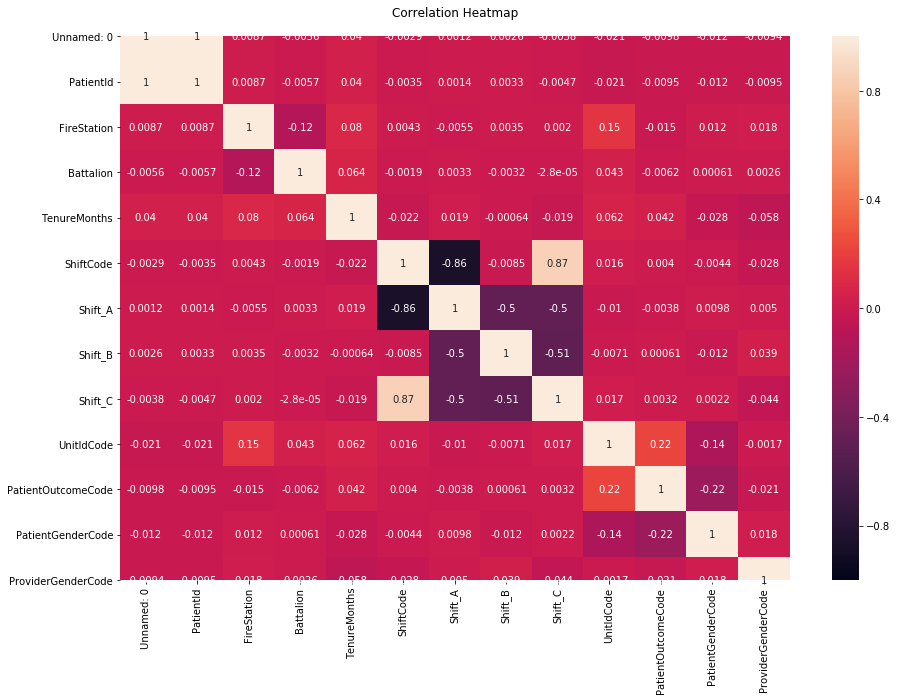

In [635]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(df_patients.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12},pad=20)

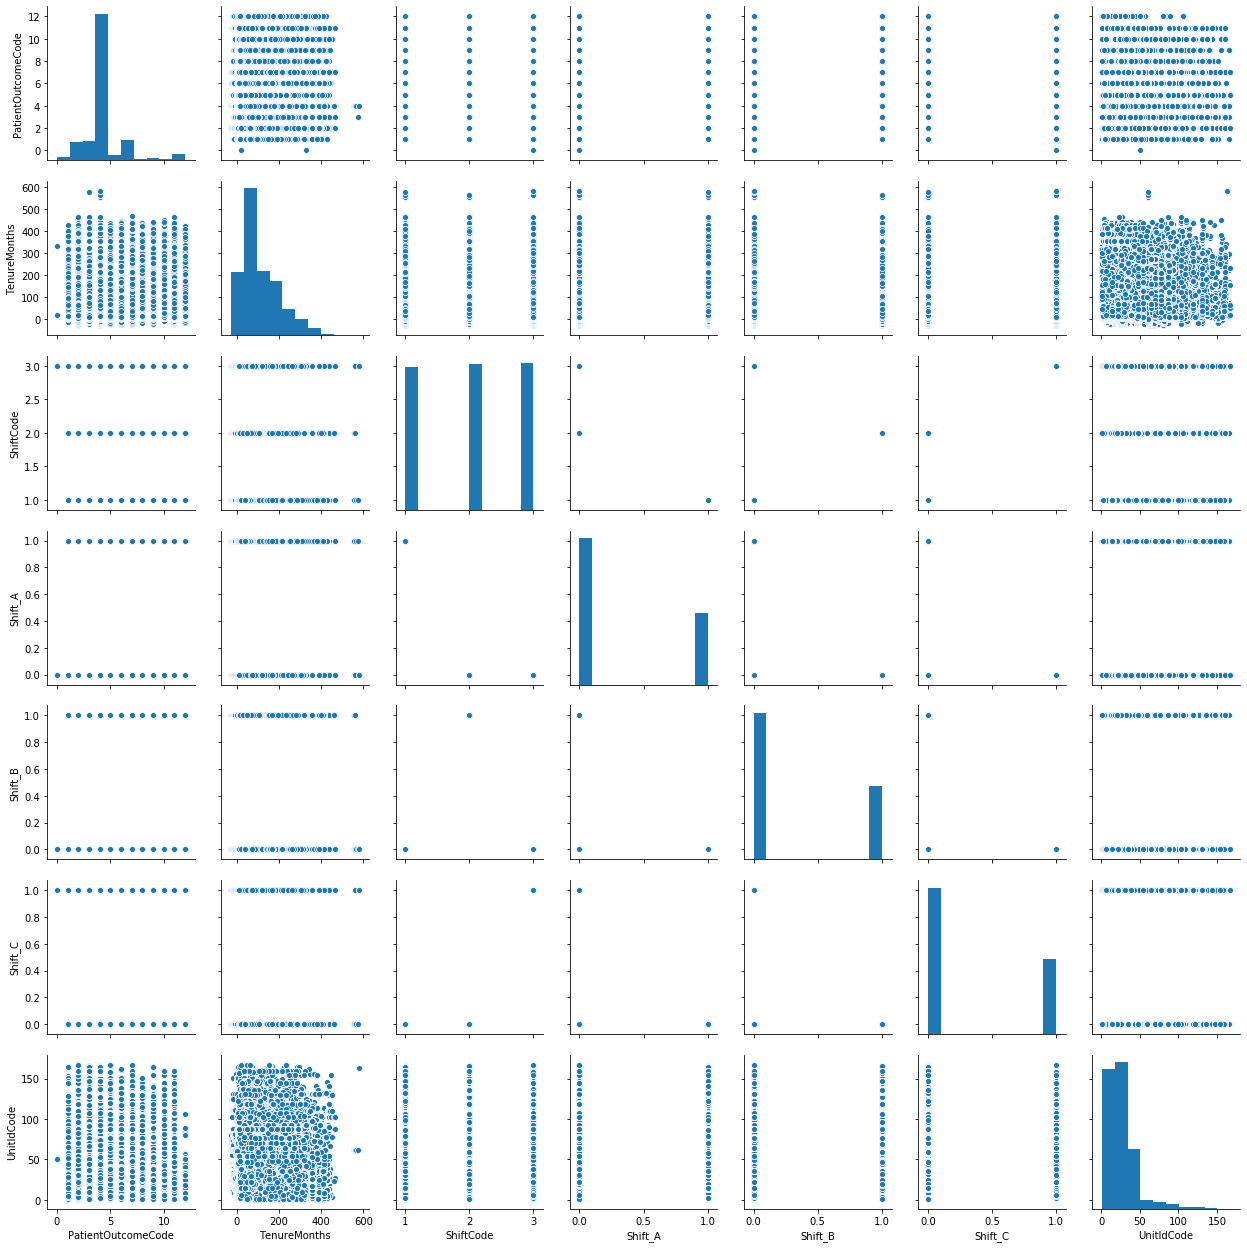

In [289]:
#sns.pairplot(df_patients, vars=['PatientOutcomeCode','TenureMonths', 'ShiftCode', 'Shift_A', 'Shift_B', 'Shift_C', 'UnitIdCode' ])

## Looks Like simple correlations are not going to be very useful so lets look at some other ways to investigate relationships
***
## But first we need to check out the tenure of the providers so we have a better understanding of what we are working with.

In [636]:
df_patients["TenureMonths"].describe()


count    543256.000000
mean        111.532337
std          86.889145
min         -27.000000
25%          44.000000
50%          80.000000
75%         163.000000
max         580.000000
Name: TenureMonths, dtype: float64

Clearly a tenure should not be negative so why is our min = -27?

## Convert the date fields that were read in as strings into datetime objects

In [637]:

df_patients["DispatchTime"]=df_patients["DispatchTime"].astype('datetime64[ns]')
df_patients["FRDPersonnelStartDate"]=df_patients["FRDPersonnelStartDate"].astype('datetime64[ns]')


In [638]:
df_patients.head(1)


,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,CrewMemberRoles,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,1,0,0,1,1,0,1


## Find the time travelers (those with start dates after the dispatch date)

In [639]:
#Extract the records with a time traveler for a provider and put them in a new dataset
df_TimeTravelers=df_patients[(df_patients["DispatchTime"].dt.date - df_patients["FRDPersonnelStartDate"].dt.date)<dt.timedelta()]
df_TimeTravelers.shape

(573, 22)

In [640]:
# Create a dataframe with just the FRD Personnel Information (ID,StartDate), and Dispatch Time
df_tt=df_TimeTravelers
df_ttID=df_tt["FRDPersonnelID"].unique()
df_ttID=pd.DataFrame({"FRDPersonnelID" : df_ttID})
df_ttDetail=pd.merge(df_ttID,df_tt[["FRDPersonnelID","DispatchTime","FRDPersonnelStartDate"]],
                    how='outer', on='FRDPersonnelID')
            
df_ttDetail



,FRDPersonnelID,DispatchTime,FRDPersonnelStartDate
0,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-04 23:12:22,2020-04-13
1,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-05 03:33:54,2020-04-13
2,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-08 20:08:40,2020-04-13
3,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-09 02:05:04,2020-04-13
4,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-12 21:29:06,2020-04-13
...,...,...,...
568,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-11 19:27:30,2020-08-06
569,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-16 08:47:01,2020-08-06
570,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-16 10:39:50,2020-08-06
571,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-16 18:11:14,2020-08-06


In [641]:
#Find the providers that are the time travelers (unique IDs)  This is for our Partner to Vet
pd.merge(df_ttID,df_tt[["FRDPersonnelID","FRDPersonnelStartDate"]],
                    how='left', on='FRDPersonnelID').drop_duplicates()


,FRDPersonnelID,FRDPersonnelStartDate
0,DDB27180-A778-4655-8FC6-F9511F36175B,2020-04-13
97,A7D3C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-08
99,86D2C99E-9E01-E211-B5F5-78E7D18CFD3C,2019-10-29
447,3FD2C99E-9E01-E211-B5F5-78E7D18CFD3C,2019-01-21
462,6FB584B8-F37D-45E3-8FCC-C820ACF46816,2019-12-09
500,40749ECE-1493-4759-B3E2-643F8D2A71EA,2020-10-26
551,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2020-08-06


## Remove the Time travelers
The determiniation was to remove the time travelers from the dataset as there were only 7 providers that accounted for 573 records.

In [642]:
df_patientsGood = df_patients[(df_patients["DispatchTime"].dt.date - df_patients["FRDPersonnelStartDate"].dt.date)>=dt.timedelta()]
df_patientsGood.shape

(542683, 22)

In [643]:
df_patients.shape

(543256, 22)

In [644]:
#Ensure that the negative tenures have been removed.
df_patientsGood["TenureMonths"].describe()

count    542683.000000
mean        111.662403
std          86.842396
min           0.000000
25%          44.000000
50%          80.000000
75%         163.000000
max         580.000000
Name: TenureMonths, dtype: float64

***

## Lets look at Patient Outcomes
First I look at the value counts for the possible PatientOutcomes

In [645]:
df_patientsGood["PatientOutcome"].value_counts()

Treated & Transported                        355825
Patient Refusal  (AMA)                        46554
No Treatment/Transport Required               44836
Canceled (Prior to Arrival)                   38644
EMS Assist (Other Agency)                     13655
Canceled (On Scene, No Patient Contact)       12176
No Patient Found                              10490
Standby (No Services Performed)                8647
Patient Dead at Scene (No EMS CPR)             4853
Standby (Operational Support Provided)         3235
Treated, Transferred Care                      2469
Patient Dead at Scene (EMS CPR Attempted)      1299
Name: PatientOutcome, dtype: int64

I then use this output to generate an OutcomeOrder to be used in plots later.

In [646]:
#Put the value_counts into a dataframe  
value_counts=df_patientsGood['PatientOutcome'].value_counts()
df_Outcomes=pd.DataFrame(value_counts)
df_Outcomes.reset_index(inplace=True)
df_Outcomes.columns=["Outcome","Count"]
df_Outcomes.set_index(keys=["Outcome"])
df_Outcomes

,Outcome,Count
0,Treated & Transported,355825
1,Patient Refusal (AMA),46554
2,No Treatment/Transport Required,44836
3,Canceled (Prior to Arrival),38644
4,EMS Assist (Other Agency),13655
5,"Canceled (On Scene, No Patient Contact)",12176
6,No Patient Found,10490
7,Standby (No Services Performed),8647
8,Patient Dead at Scene (No EMS CPR),4853
9,Standby (Operational Support Provided),3235


In [647]:
#Create the OutcomeOrder array from the newly created dataframe
OutcomeOrder=np.array(df_Outcomes["Outcome"])
OutcomeOrder

array(['Treated & Transported ', 'Patient Refusal  (AMA)',
       'No Treatment/Transport Required', 'Canceled (Prior to Arrival) ',
       'EMS Assist (Other Agency)',
       'Canceled (On Scene, No Patient Contact) ', 'No Patient Found',
       'Standby (No Services Performed)',
       'Patient Dead at Scene (No EMS CPR)',
       'Standby (Operational Support Provided)',
       'Treated, Transferred Care ',
       'Patient Dead at Scene (EMS CPR Attempted)'], dtype=object)

***
## Let's get some record counts and some potentially useful dataframes of unique values (provider, CrewMemberRoles)

### First the Providers

In [648]:
Providers=df_patientsGood["FRDPersonnelID"].value_counts()
df_Providers=pd.DataFrame(Providers)
df_Providers.reset_index(inplace=True)
df_Providers.columns=["ProviderID","Count"]
df_Providers.set_index(keys=["ProviderID"])
df_Providers

,ProviderID,Count
0,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2763
1,2AD4C99E-9E01-E211-B5F5-78E7D18CFD3C,2602
2,54D7C99E-9E01-E211-B5F5-78E7D18CFD3C,2543
3,D6D4C99E-9E01-E211-B5F5-78E7D18CFD3C,2140
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2133
...,...,...
1823,F7D8C99E-9E01-E211-B5F5-78E7D18CFD3C,1
1824,17D2C99E-9E01-E211-B5F5-78E7D18CFD3C,1
1825,27D5C99E-9E01-E211-B5F5-78E7D18CFD3C,1
1826,C3D8C99E-9E01-E211-B5F5-78E7D18CFD3C,1


### Then the Patients

In [649]:
Patients=df_patientsGood["PatientId"].value_counts()
df_Patients=pd.DataFrame(Patients)
df_Patients.reset_index(inplace=True)
df_Patients.columns=["PatientId","Count"]
df_Patients.set_index(keys=["PatientId"])
df_Patients

,PatientId,Count
0,1277746,10
1,1270697,10
2,791874,9
3,587056,8
4,818635,8
...,...,...
246923,491927,1
246924,647847,1
246925,768777,1
246926,614990,1


### Then the Crew Member Roles

In [650]:
CMRoles=df_cum['CrewMemberRoles'].value_counts()
df_Roles=pd.DataFrame(CMRoles)
df_Roles.reset_index(inplace=True)
df_Roles.columns=["CrewMemberRoles","Count"]
df_Roles.set_index(keys=["CrewMemberRoles"])
df_Roles

,CrewMemberRoles,Count
0,"Primary Patient Caregiver-At Scene,Primary Pat...",210652
1,"Driver-Response,Driver-Transport",97310
2,"Driver-Response,Driver-Transport,Other Patient...",82208
3,"Primary Patient Caregiver-Transport,Primary Pa...",25831
4,"Driver-Transport,Driver-Response",25817
...,...,...
217,"Intern/Student,Primary Patient Caregiver-Trans...",1
218,"Driver-Response,Other Patient Caregiver-Transp...",1
219,"Primary Patient Caregiver-Transport, Primary P...",1
220,"Other Patient Caregiver-At Scene, Other Patien...",1


### Now lets get some useful counts and put them in a dataframe for future reference

In [651]:
num_uProviders =len(df_patientsGood["FRDPersonnelID"].unique())
num_uPatients  =len(df_patientsGood["PatientId"].unique()) 
num_uCrewMemberRoles =len(df_patientsGood["CrewMemberRoles"].unique())
num_DriverRecords=len(df_patientsGood[df_patientsGood['CrewMemberRoles'].str.find('Driver')!=(-1)])
num_PrimaryCareRecords =len(df_patientsGood[df_patientsGood['CrewMemberRoles'].str.find('Primary')!=(-1)])
num_TotalRecords=len(df_patientsGood)
df_Counts=pd.DataFrame({"Name" : ["Providers", "Patients", "CrewMemberRoles", "DriverRecords", "PrimaryCareRecords","TotalRecords"],
                        "Value" : [num_uProviders, num_uPatients, num_uCrewMemberRoles, num_DriverRecords, num_PrimaryCareRecords, num_TotalRecords]})
df_Counts

,Name,Value
0,Providers,1828
1,Patients,246928
2,CrewMemberRoles,222
3,DriverRecords,247677
4,PrimaryCareRecords,246920
5,TotalRecords,542683


***
## Investigation of Crew Member Roles
### Based on Discussions with the Partner, we should only be looking at the Primary provider records as they are the one that determine the Patient Outcome

In [652]:
num_DriverRoles=len(df_Roles[df_Roles['CrewMemberRoles'].str.find('Driver')!=(-1)])
num_PrimaryCareRoles =len(df_Roles[df_Roles['CrewMemberRoles'].str.find('Primary')!=(-1)])
num_neitherRoles =len(df_Roles[((df_Roles['CrewMemberRoles'].str.find('Primary')==(-1)) & (df_Roles['CrewMemberRoles'].str.find('Driver')==(-1)))])
print("There are {} Roles with Driver in them.".format(num_DriverRoles))
print("There are {} Roles with Primary in them.".format(num_DriverRoles))
print("There are {} Roles with neither Driver or Primary in them.".format(num_neitherRoles))

There are 154 Roles with Driver in them.
There are 154 Roles with Primary in them.
There are 14 Roles with neither Driver or Primary in them.


In [653]:
df_xNeither=df_Roles[((df_Roles['CrewMemberRoles'].str.find('Primary')==(-1)) & (df_Roles['CrewMemberRoles'].str.find('Driver')==(-1)))]
df_xDriver=df_Roles[df_Roles['CrewMemberRoles'].str.find('Driver')!=(-1)]
df_xPrimary=df_Roles[df_Roles['CrewMemberRoles'].str.find('Primary')!=(-1)]
df_xNeither.Count.sum()
print("There are {} Patient/Provider Records with Driver in the Role.".format(df_xDriver.Count.sum()))
print("There are {} Patient/Provider Records with Primary in the Role.".format(df_xPrimary.Count.sum()))
print("There are {} Patient/Provider Records with neither Driver or Primary in the Role.".format(df_xNeither.Count.sum()))

There are 247678 Patient/Provider Records with Driver in the Role.
There are 246921 Patient/Provider Records with Primary in the Role.
There are 49830 Patient/Provider Records with neither Driver or Primary in the Role.


### Need to determine if there are any patients that don't have a primary provider
Looks like there could be at least eight records, need to find them and investigate before removing non-primary from the dataset.

### Check to make sure that ALL Patients only have one value for PatientOutcome

In [654]:
print("There are {} unique patients and\nThere are {} unique patient/outcome pairings.\nThese should be equal.".format(num_uPatients,
    len(df_patientsGood[["PatientId","PatientOutcome"]].drop_duplicates())))

There are 246928 unique patients and
There are 246928 unique patient/outcome pairings.
These should be equal.


### Find patients that don't have a record with a primary care provider

In [655]:
df_wPrimary=df_patientsGood[df_patientsGood['CrewMemberRoles'].str.find('Primary')!=(-1)]
print("There are {} records that have a Primary role.".format(len(df_wPrimary["PatientId"].unique())))
print("There are {} unique patients in the dataset.".format(num_uPatients))
print("Ideally these should be the same number if each patient only has one primary provider.")

There are 246828 records that have a Primary role.
There are 246928 unique patients in the dataset.
Ideally these should be the same number if each patient only has one primary provider.


In [656]:
#Create a dataframe with only the "Primary" records.
df_good=pd.DataFrame(df_wPrimary["PatientId"].unique(),columns=["PatientId"])

#Create a dataframe with only the records from patients that don't have at least one record in the "Primary" records dataframe.
df_bad=df_patientsGood[~df_patientsGood.PatientId.isin(df_good.PatientId)]

#Show only the PatientId, FRDPersonnelID, and CrewMemberRoles columns of the resulting dataframe
df_bad.iloc[:,[2,3,13]]

,FRDPersonnelID,Shift,TenureMonths
2030,C9497729-FB75-E511-80CD-001DD8B71D38,C - Shift,31
2031,C922FD9F-7ABC-4F53-BAEE-B7532BAFD76C,C - Shift,14
2032,B1D40364-5F88-4B51-A99B-7292F19002C7,C - Shift,26
2105,C9497729-FB75-E511-80CD-001DD8B71D38,C - Shift,31
2106,C922FD9F-7ABC-4F53-BAEE-B7532BAFD76C,C - Shift,14
...,...,...,...
505790,08885573-C60B-4D73-B1B6-2ED899137FCA,C - Shift,37
507727,32F0AD09-EA5B-4414-8C0B-CABB54ABC827,C - Shift,43
507728,B828003A-2419-437B-96F3-1B3EBCDF2852,C - Shift,57
507729,53D6C99E-9E01-E211-B5F5-78E7D18CFD3C,C - Shift,300


In [657]:
#How many patients are represented by these records?
len(df_bad["PatientId"].unique())

100

These patients may have no primary record because it was removed during initial cleaning (no provider start date, time traveler, etc)
### Since this is such a small number of records I am not investigating any further and these records will eventually be dropped in future analyses.

***
***
# This is Where I'm Working Right Now
Need to figure out which patients don't have a "primary" provider!
***
***

***
## Analysis of Distributions (Outcomes by Tenure)
### A violin plot to see distribution of outcomes within tenure bins. Start with bin set to 1 month

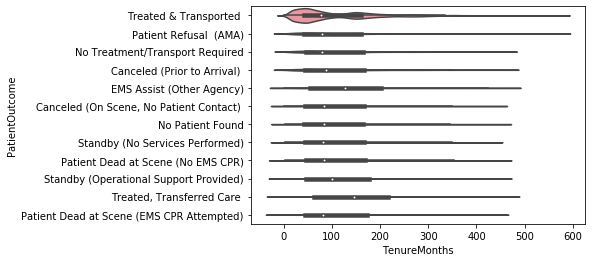

In [658]:
sns.violinplot("TenureMonths","PatientOutcome",
               data=df_patientsGood, 
               scale='count',
              order=OutcomeOrder);

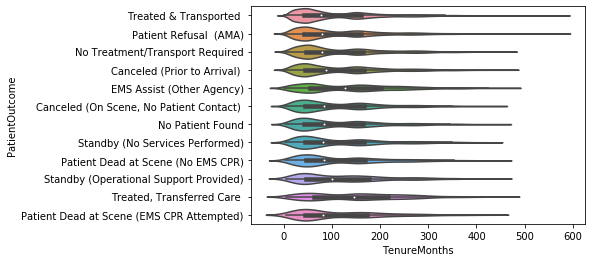

In [659]:
sns.violinplot("TenureMonths","PatientOutcome",
               data=df_patientsGood, 
               scale='area',
              order=OutcomeOrder);

### Now lets bin by years.  Here we simply divide the TenureMonths by 12 and drop the remainder.
__Calculation of Tenure in Months results in value that represents number of completed years of service.  (e.g. 35 months -> 2 years, 36 months -> 3 years)__

In [660]:
df_patientsGood.loc[:,"TenureYears"]=np.floor(df_patientsGood["TenureMonths"]/12)

In [661]:
df_patientsGood.shape

(542683, 23)

In [662]:
df_patientsGood.head()

,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode,TenureYears
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,244,1,1,0,0,1,1,0,1,20.0
1,1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,130,1,1,0,0,1,1,0,1,10.0
2,2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,112,1,1,0,0,1,1,0,1,9.0
3,3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,74,1,1,0,0,2,2,0,1,6.0
4,4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,70,1,1,0,0,2,2,0,1,5.0


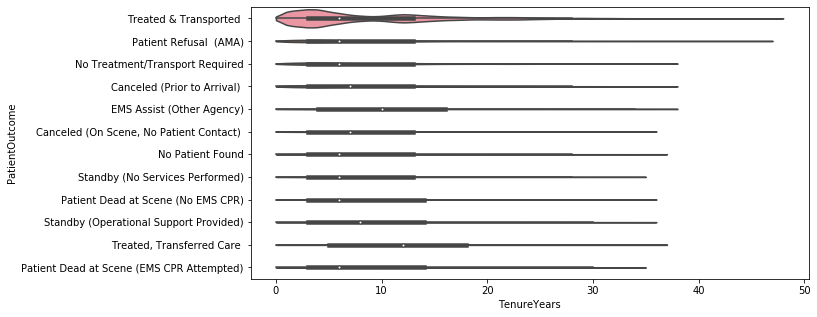

In [663]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_patientsGood, 
               scale='count',
              order=OutcomeOrder, cut=0);

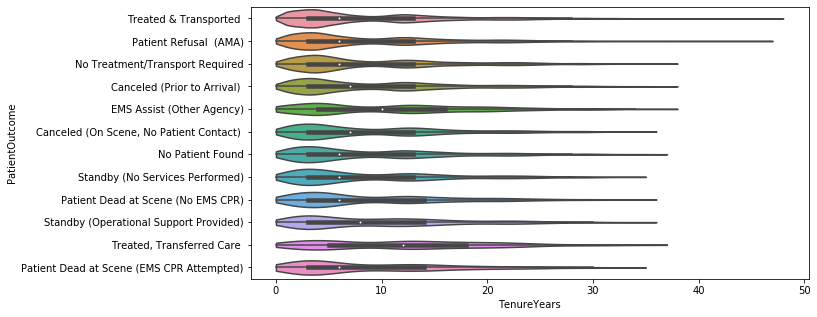

In [664]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_patientsGood,
               scale='area',
               inner='box',
              order=OutcomeOrder, cut=0);

### Now lets look at binning tenure by the decade (number of 10 year blocks of service completed)
__Since the same rounding principle is used here as in the year calculations (e.g. 119 months -> 0 decades, 120 months -> 1 decade)__

In [665]:
df_patientsGood.loc[:,"TenureDecade"]=np.floor(df_patientsGood["TenureMonths"]/120)

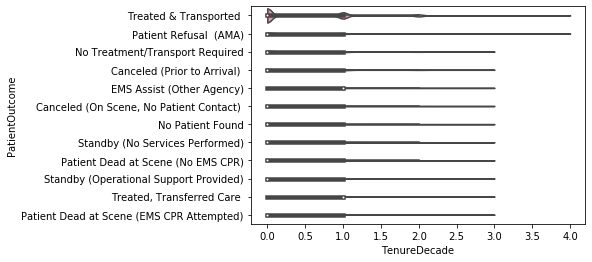

In [666]:
sns.violinplot("TenureDecade","PatientOutcome",
               data=df_patientsGood, 
               scale='count',
              order=OutcomeOrder,
              cut=0);

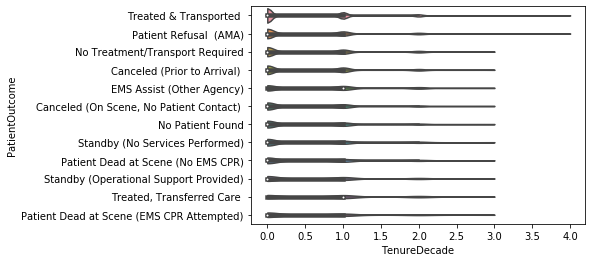

In [667]:
sns.violinplot("TenureDecade","PatientOutcome",
               data=df_patientsGood, 
               scale='area',
              order=OutcomeOrder,
              cut=0);

### Exploration into the distributions for tenure of the providers.

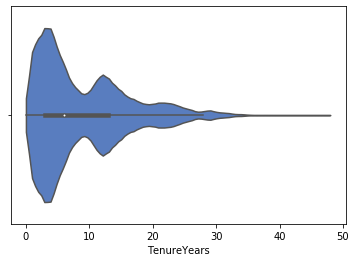

In [668]:
sns.violinplot(x="TenureYears",
               data=df_patientsGood,
               palette="muted",
               scale='count', cut=0);

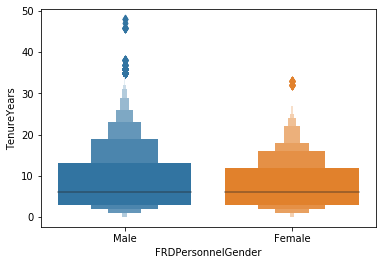

In [669]:
sns.boxenplot(data=df_patientsGood,
            y="TenureYears",
            x="FRDPersonnelGender")

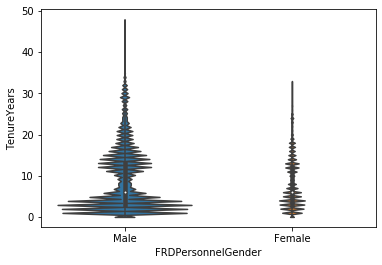

In [670]:
sns.violinplot(data=df_patientsGood,
            y="TenureYears",
            x="FRDPersonnelGender",
              scale="count", bw=.02, cut=0)

***
## Exploring an alternative definition for tenure (number of calls instead of time in department)

In [671]:
df_patientsGood.reset_index(inplace=True)
df_patientsGood.columns

Index(['index', 'Unnamed: 0', 'PatientId', 'FRDPersonnelID', 'Shift', 'UnitId',
       'FireStation', 'Battalion', 'PatientOutcome', 'PatientGender',
       'DispatchTime', 'FRDPersonnelGender', 'FRDPersonnelStartDate',
       'CrewMemberRoles', 'TenureMonths', 'ShiftCode', 'Shift_A', 'Shift_B',
       'Shift_C', 'UnitIdCode', 'PatientOutcomeCode', 'PatientGenderCode',
       'ProviderGenderCode', 'TenureYears', 'TenureDecade'],
      dtype='object')

In [672]:
#Remove unwanted columns to make dataset easier to work with

df_cum=df_patientsGood.drop(columns=['Unnamed: 0','Shift', 'ShiftCode', 'Shift_A', 'Shift_B', 'Shift_C',
       'PatientGenderCode', 'PatientGender', 'UnitIdCode',
       'ProviderGenderCode']).copy()

df_cum.head()

,index,PatientId,FRDPersonnelID,UnitId,FireStation,Battalion,PatientOutcome,DispatchTime,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,PatientOutcomeCode,TenureYears,TenureDecade
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,M404,4,401,Standby (No Services Performed),2018-01-01 00:29:02,Male,1997-08-18,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,20.0,2.0
1,1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,M404,4,401,Standby (No Services Performed),2018-01-01 00:29:02,Male,2007-02-19,"Driver-Transport,Other Patient Caregiver-At Scene",130,1,10.0,1.0
2,2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,M404,4,401,Standby (No Services Performed),2018-01-01 00:29:02,Male,2008-08-18,"Intern/Student,Other Patient Caregiver-At Scen...",112,1,9.0,0.0
3,3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,M401,1,402,No Treatment/Transport Required,2018-01-01 00:40:54,Male,2011-10-24,"Primary Patient Caregiver-At Scene,Primary Pat...",74,2,6.0,0.0
4,4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,M401,1,402,No Treatment/Transport Required,2018-01-01 00:40:54,Male,2012-02-27,"Driver-Response,Driver-Transport",70,2,5.0,0.0


### This batch of code will create a "Cumulative Calls" column that captures the total number of calls a provider has been on including the current call

In [673]:
df_cum['CallCount']=1
df_cum=df_cum.sort_values("DispatchTime")
df_gb=df_cum.groupby(by=["FRDPersonnelID","DispatchTime"]).count().groupby(level=0)
cumsums=df_gb['CallCount'].cumsum()
df_cum.set_index(["FRDPersonnelID","DispatchTime"],inplace=True)
df_cum['CumulativeCalls'] = cumsums
df_cum.reset_index(inplace=True)
df_cum.head()

,FRDPersonnelID,DispatchTime,index,PatientId,UnitId,FireStation,Battalion,PatientOutcome,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,PatientOutcomeCode,TenureYears,TenureDecade,CallCount,CumulativeCalls
0,58D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:04:06,7,479853,M435,35,407,Treated & Transported,Male,2004-07-12,"Primary Patient Caregiver-At Scene,Primary Pat...",161,4,13.0,1.0,1,1
1,E3355223-4A4C-45E7-B0FF-3CB9161A3546,2018-01-01 00:04:06,8,479853,M435,35,407,Treated & Transported,Male,2016-02-08,"Driver-Response,Driver-Transport",22,4,1.0,0.0,1,1
2,EFD3C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:20:49,5,479851,M419,19,406,Patient Refusal (AMA),Male,2006-10-02,"Driver-Response,Driver-Transport",135,3,11.0,1.0,1,1
3,87FF4CAE-C419-E511-80CA-001DD8B71D38,2018-01-01 00:20:49,6,479851,M419,19,406,Patient Refusal (AMA),Male,2015-01-12,"Primary Patient Caregiver-At Scene,Primary Pat...",35,3,2.0,0.0,1,1
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:29:02,0,479838,M404,4,401,Standby (No Services Performed),Male,1997-08-18,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,20.0,2.0,1,1


Text(0.5, 1.0, 'Tenure distribution')

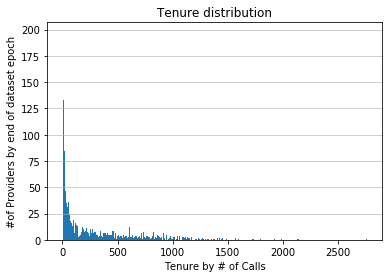

In [674]:
ProviderCallCounts=df_cum["FRDPersonnelID"].value_counts()
n, bins, patches = plt.hist(x=ProviderCallCounts,bins=500)
plt.grid(axis='y', alpha=.75)
plt.xlabel('Tenure by # of Calls')
plt.ylabel('#of Providers by end of dataset epoch')
plt.title('Tenure distribution')

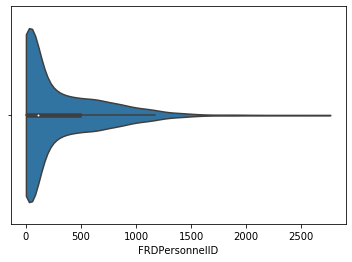

In [675]:
sns.violinplot(x=ProviderCallCounts, cut=0)

### The top twenty five providers by call count

In [676]:
#Create a dataframe containing the provider call counts.
df_ProviderCallCounts=pd.DataFrame(ProviderCallCounts)
df_ProviderCallCounts.reset_index(inplace=True)
df_ProviderCallCounts.columns=["Provider","CallCount"]
df_ProviderCallCounts.set_index(keys=["Provider"])
df_ProviderCallCounts.nlargest(25,'CallCount')

,Provider,CallCount
0,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2763
1,2AD4C99E-9E01-E211-B5F5-78E7D18CFD3C,2602
2,54D7C99E-9E01-E211-B5F5-78E7D18CFD3C,2543
3,D6D4C99E-9E01-E211-B5F5-78E7D18CFD3C,2140
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2133
5,DFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,1989
6,66D3C99E-9E01-E211-B5F5-78E7D18CFD3C,1927
7,A7D2C99E-9E01-E211-B5F5-78E7D18CFD3C,1908
8,BADEF4BD-8250-E311-B3F8-AE437D699481,1868
9,87FF4CAE-C419-E511-80CA-001DD8B71D38,1798


### Violin plots for Outcomes vs Tenure using Cumulative Calls method.  First plot by count, second by area(normalized).

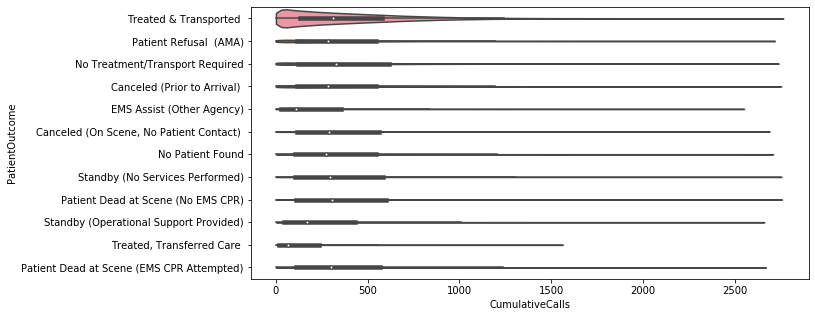

In [677]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_cum, 
               scale='count',
              order=OutcomeOrder,
              cut=0);

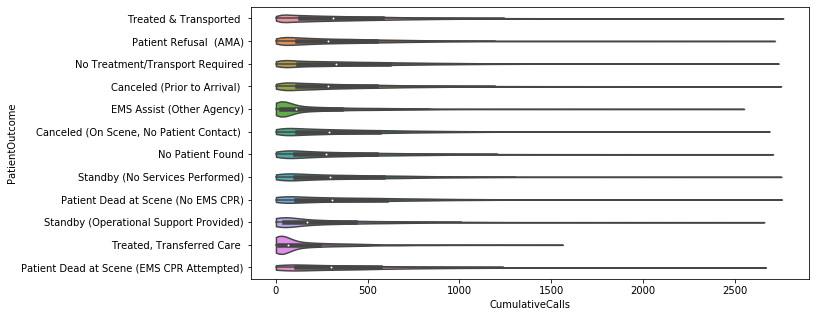

In [678]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_cum, 
               scale='area',
              order=OutcomeOrder,
              cut=0);

### Looking at distribution of outcomes

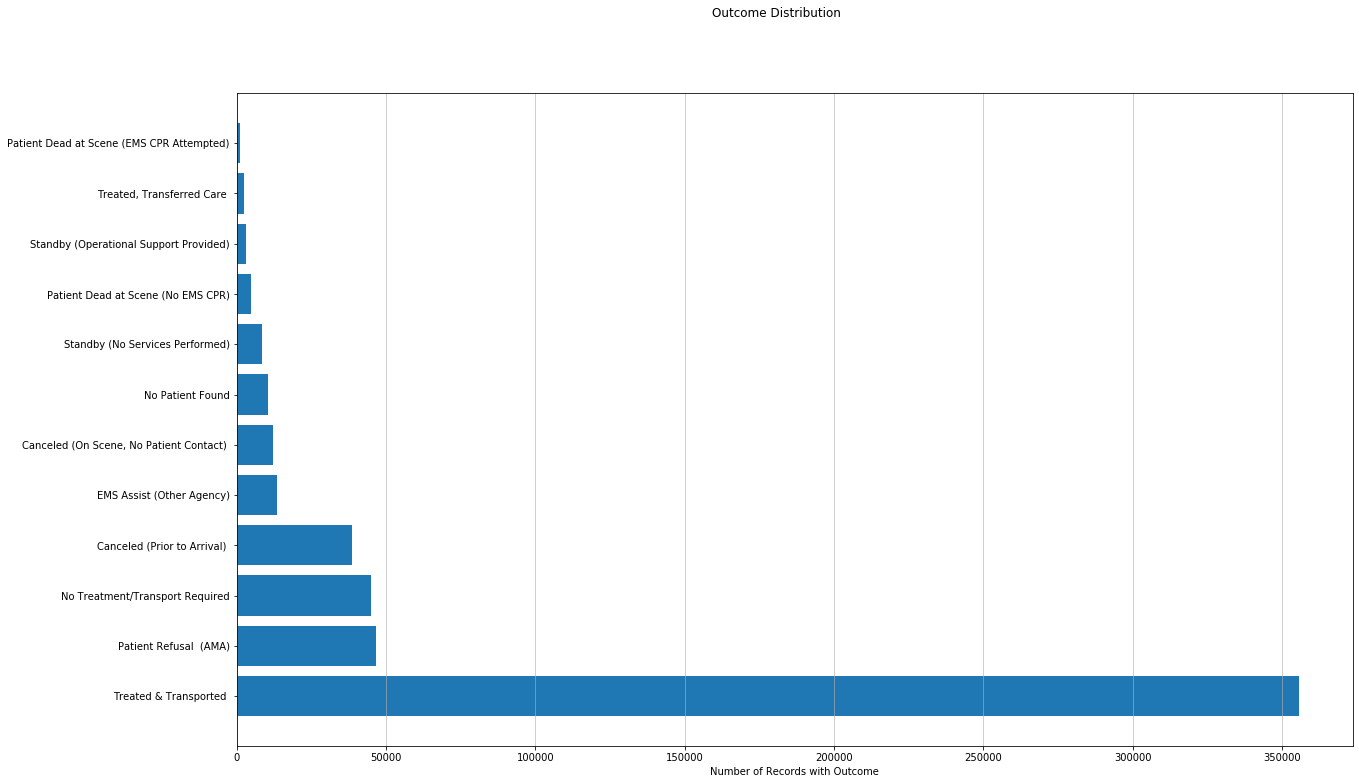

In [679]:
fig=plt.figure(figsize=(20,12))
value_counts=df_cum['PatientOutcome'].value_counts()
df_Outcomes=pd.DataFrame(value_counts)
df_Outcomes.reset_index(inplace=True)
df_Outcomes.columns=["Outcome","Count"]

#Bar chart
ax1=plt.subplot()
ax1.barh(df_Outcomes['Outcome'],width=df_Outcomes['Count'])
ax1.set_xlabel('Number of Records with Outcome')
ax1.grid(axis='x', alpha=.75)

#Draw vertical line on boxplot indicating the percentage of male patients vs female patients
#patientCount=dfReduced[['PatientId','PatientGender']].drop_duplicates()['PatientGender'].value_counts()
#ax1.axvline(x=(patientCount['Male']/(patientCount.sum())*100),color='black')

fig.suptitle('Outcome Distribution')
plt.show()

In [680]:
#Drop the Treated & Transported records to bring out the detail
df_Outcomes2=df_Outcomes.iloc[1:]
df_Outcomes2.shape

(11, 2)

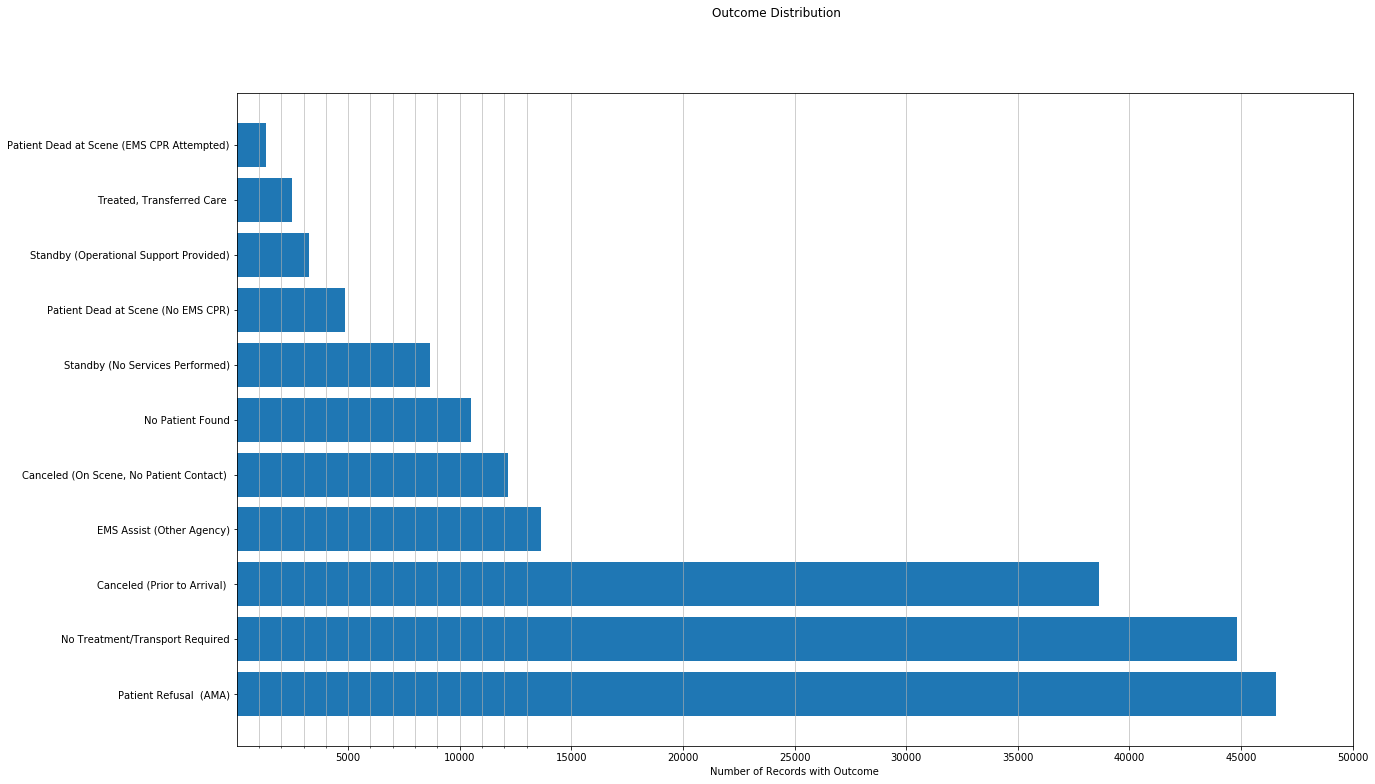

In [681]:
fig=plt.figure(figsize=(20,12))

#Bar chart
ax1=plt.subplot()
ax1.barh(df_Outcomes2['Outcome'],width=df_Outcomes2['Count'])
ax1.set_xlabel('Number of Records with Outcome')
ax1.grid(axis='x', alpha=.75, which='both')
ax1.set_xticks(minor=True, ticks=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000])
ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])

#Draw vertical line on boxplot indicating the percentage of male patients vs female patients
#patientCount=dfReduced[['PatientId','PatientGender']].drop_duplicates()['PatientGender'].value_counts()
#ax1.axvline(x=(patientCount['Male']/(patientCount.sum())*100),color='black')

fig.suptitle('Outcome Distribution')
plt.show()

***
***
## Now lets work with only "Primary" records to remove any skewing due to multiple providers per patient.

In [682]:
# Start by selecting only the records in df_cum that have a Primary Care Provider

df_primary=df_cum[df_cum['CrewMemberRoles'].str.find('Primary')!=(-1)]
num_Prim=len(df_primary)
num_Pat=len(df_primary['PatientId'].unique())
print("There are {} records with a Primary provider specified.".format(num_Prim))
print("There are {} unique patients in this set.".format(num_Pat))
print("That means there are {} records that provide conflicting or duplicate information.".format(num_Prim-num_Pat))
print("That's only {:.2f}% of the total records.".format((num_Prim-num_Pat)/num_Prim*100))

There are 246920 records with a Primary provider specified.
There are 246828 unique patients in this set.
That means there are 92 records that provide conflicting or duplicate information.
That's only 0.04% of the total records.


### Since the number of duplicate or conflicting records is so small, choosing to ignore.

***
### Let's repeat the violin plots (at least for Tenure by year and by Call Count) with the new data.

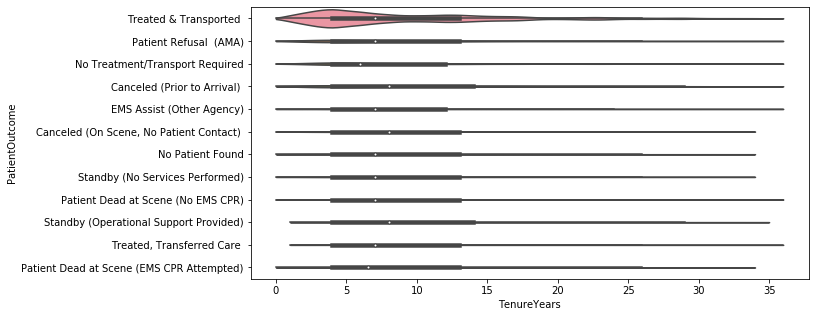

In [683]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_primary, 
               scale='count',
              order=OutcomeOrder, cut=0);

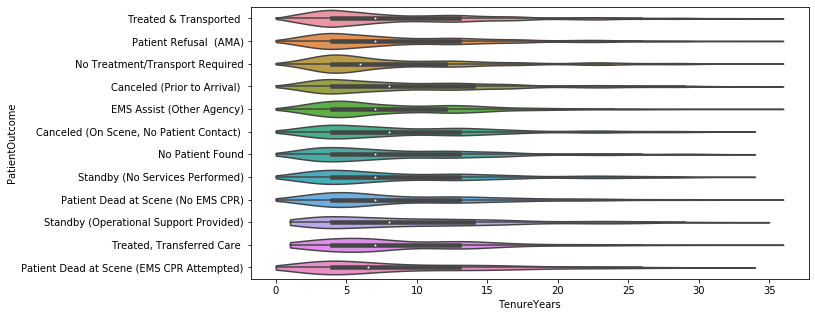

In [684]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_primary, 
               scale='area',
              order=OutcomeOrder, cut=0);

### Violin Plots by Tenure by Call Count (Primary Care records only)

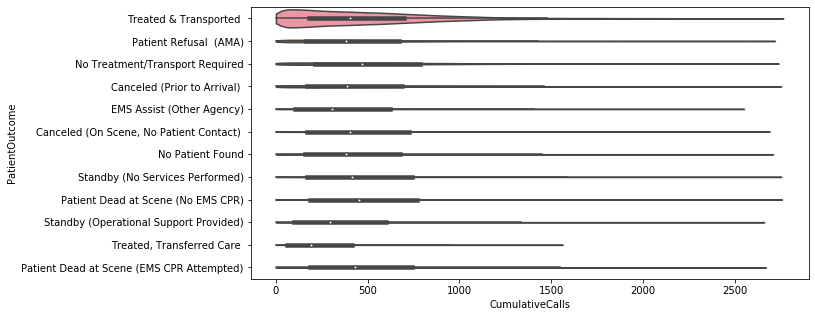

In [685]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_primary, 
               scale='count',
              order=OutcomeOrder,
              cut=0);

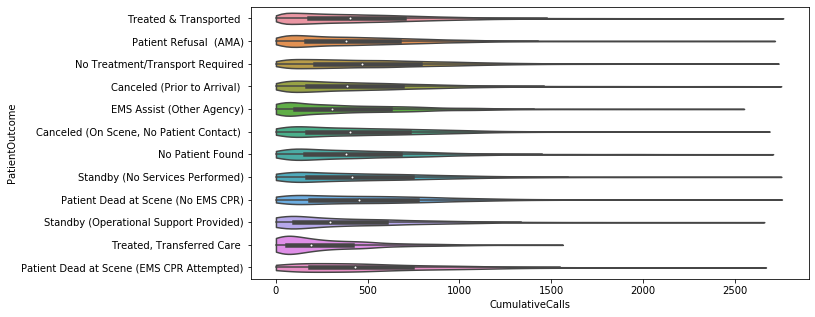

In [686]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_primary, 
               scale='area',
              order=OutcomeOrder,
              cut=0);

***
## Taking Unit Type into account

In [687]:
UnitCounts=df_primary["UnitId"].value_counts()
#Create a dataframe containing the Unit and counts.
df_UnitCounts=pd.DataFrame(UnitCounts)
df_UnitCounts.reset_index(inplace=True)
df_UnitCounts.columns=["UnitId","Count"]
df_UnitCounts.set_index(keys=["UnitId"])
df_UnitCounts

,UnitId,Count
0,M422,8387
1,M430,8277
2,M405,7323
3,M426,7310
4,M425,7089
...,...,...
162,T441,1
163,T424,1
164,LA436,1
165,K441,1


In [688]:
# Find Types
# The regular expression matches the first letters as the type and the remainder is dropped.
# This creates a series of unit types in the same order as the units in df_UnitCounts.
df_types=df_UnitCounts['UnitId'].str.extract(r'(?P<Type>[BCMEFTURASLKHV]+)\d+[BE]?')
df_types.Type.value_counts().sum()

167

In [689]:
# Create Unit Type Key with counts
# Concatenate the type back onto the dataframe to create the new dataframe
df_UnitCnt_wType=pd.concat([df_UnitCounts,df_types],axis=1)
df_UnitCnt_wType.head()

,UnitId,Count,Type
0,M422,8387,M
1,M430,8277,M
2,M405,7323,M
3,M426,7310,M
4,M425,7089,M


In [690]:
df_UnitCnt_wType.Type.value_counts()

M      54
E      40
A      24
TL     11
T      11
R       8
EMS     7
TT      4
BC      2
LA      2
UTV     1
K       1
UT      1
HM      1
Name: Type, dtype: int64

In [691]:
#Create a dataframe containing the Unit type and counts.
UnitTypeCounts=df_UnitCnt_wType.Type.value_counts()
df_UnitTypeCounts=pd.DataFrame(UnitTypeCounts)
df_UnitTypeCounts.reset_index(inplace=True)
df_UnitTypeCounts.columns=["UnitType","Count"]
df_UnitTypeCounts.set_index(keys=["UnitType"])
df_UnitTypeCounts

,UnitType,Count
0,M,54
1,E,40
2,A,24
3,TL,11
4,T,11
5,R,8
6,EMS,7
7,TT,4
8,BC,2
9,LA,2


### Now lets add the unit type column to the main dataset so we can filter by it's values.

In [692]:
# Need to join df_UnitCnt_wType with df_primary to create the new column
df_primaryWtype = pd.merge(df_primary,df_UnitCnt_wType,how='left',on='UnitId')

#drop the Count column as it is not needed here
df_primaryWtype.drop(columns=['Count'], inplace=True)
print("There are {} records in df_primary".format(len(df_primary)))
print("There are {} records in df_primaryWtype".format(len(df_primaryWtype)))
df_primaryWtype.head()

There are 246920 records in df_primary
There are 246920 records in df_primaryWtype


,FRDPersonnelID,DispatchTime,index,PatientId,UnitId,FireStation,Battalion,PatientOutcome,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,PatientOutcomeCode,TenureYears,TenureDecade,CallCount,CumulativeCalls,Type
0,58D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:04:06,7,479853,M435,35,407,Treated & Transported,Male,2004-07-12,"Primary Patient Caregiver-At Scene,Primary Pat...",161,4,13.0,1.0,1,1,M
1,87FF4CAE-C419-E511-80CA-001DD8B71D38,2018-01-01 00:20:49,6,479851,M419,19,406,Patient Refusal (AMA),Male,2015-01-12,"Primary Patient Caregiver-At Scene,Primary Pat...",35,3,2.0,0.0,1,1,M
2,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:29:02,0,479838,M404,4,401,Standby (No Services Performed),Male,1997-08-18,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,20.0,2.0,1,1,M
3,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:40:54,3,479839,M401,1,402,No Treatment/Transport Required,Male,2011-10-24,"Primary Patient Caregiver-At Scene,Primary Pat...",74,2,6.0,0.0,1,1,M
4,35CA45A3-9C25-4E4D-957F-2EA9E40B5974,2018-01-01 00:42:53,18,479876,M416,16,407,Treated & Transported,Male,2016-02-08,"Primary Patient Caregiver-At Scene,Primary Pat...",22,4,1.0,0.0,1,1,M


### Determine distribution of records by unit type

In [693]:
df_primaryWtype.Type.value_counts()

M      236264
E        4683
A        3324
R        1022
TT        500
TL        486
T         377
EMS       194
HM         62
BC          3
LA          2
UTV         1
UT          1
K           1
Name: Type, dtype: int64

### For this analysis we'll look at just the M=Medics, A=Ambulance, E=Engine, R=Rescue, and EMS=Emergency Medical Servics

In [694]:
df_unitMAER=df_primaryWtype[df_primaryWtype["Type"].str.match(r'[MAER]')]
df_unitMAER.Type.value_counts()

M      236264
E        4683
A        3324
R        1022
EMS       194
Name: Type, dtype: int64

### Some descriptive stats

In [695]:
num_uProviders2 =len(df_unitMAER["FRDPersonnelID"].unique())
num_uPatients2  =len(df_unitMAER["PatientId"].unique()) 
num_uCrewMemberRoles2 =len(df_unitMAER["CrewMemberRoles"].unique())
num_TotalRecords2=len(df_unitMAER)
df_Counts2=pd.DataFrame({"Name" : ["Providers", "Patients", "CrewMemberRoles", "TotalRecords"],
                        "Value" : [num_uProviders2, num_uPatients2, num_uCrewMemberRoles2, num_TotalRecords2]})
df_Counts2

,Name,Value
0,Providers,831
1,Patients,245397
2,CrewMemberRoles,121
3,TotalRecords,245487


In [696]:
df_unitMAER.FRDPersonnelID.value_counts()

DA8ED993-E0AB-4521-8FF6-54B423A95B2B    2625
54D7C99E-9E01-E211-B5F5-78E7D18CFD3C    2533
2AD4C99E-9E01-E211-B5F5-78E7D18CFD3C    2522
D6D4C99E-9E01-E211-B5F5-78E7D18CFD3C    2131
6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C    2100
                                        ... 
DBD5C99E-9E01-E211-B5F5-78E7D18CFD3C       1
58556378-B3B6-407D-BC67-58398461F23D       1
92FA5EFA-8BC0-48A6-9575-A35C5C225BC0       1
11D2C99E-9E01-E211-B5F5-78E7D18CFD3C       1
BAD6C99E-9E01-E211-B5F5-78E7D18CFD3C       1
Name: FRDPersonnelID, Length: 831, dtype: int64

In [697]:
df_unitMAER.PatientId.value_counts()

935389     2
576801     2
1063298    2
577244     2
1437391    2
          ..
566974     1
571068     1
1085115    1
1107638    1
524288     1
Name: PatientId, Length: 245397, dtype: int64

In [698]:
df_unitMAER.PatientOutcome.value_counts()

Treated & Transported                        164401
Patient Refusal  (AMA)                        21483
No Treatment/Transport Required               19911
Canceled (Prior to Arrival)                   17676
Canceled (On Scene, No Patient Contact)        5479
No Patient Found                               4613
Standby (No Services Performed)                3953
EMS Assist (Other Agency)                      3468
Patient Dead at Scene (No EMS CPR)             2086
Standby (Operational Support Provided)         1302
Treated, Transferred Care                       585
Patient Dead at Scene (EMS CPR Attempted)       530
Name: PatientOutcome, dtype: int64

***
### Repeat the Violin Plots with the new dataset

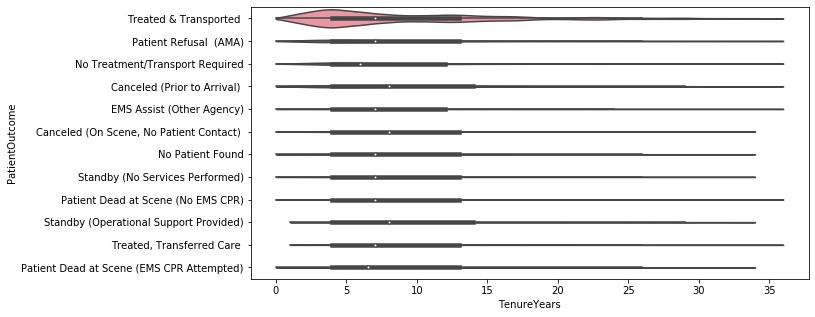

In [699]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_unitMAER, 
               scale='count',
              order=OutcomeOrder, cut=0);

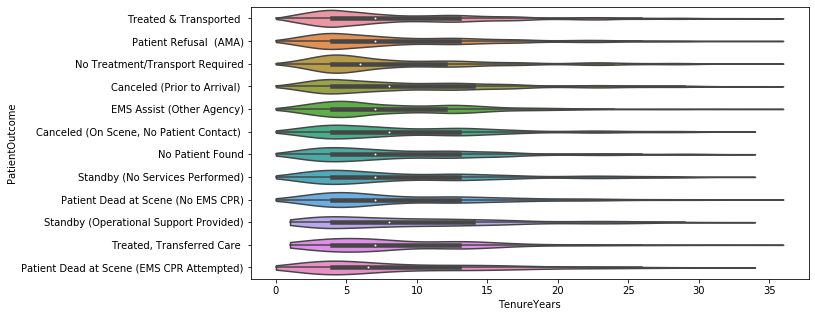

In [700]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_unitMAER, 
               scale='area',
              order=OutcomeOrder, cut=0);

### Violin Plots by Tenure by Call Count (Primary Care records only)

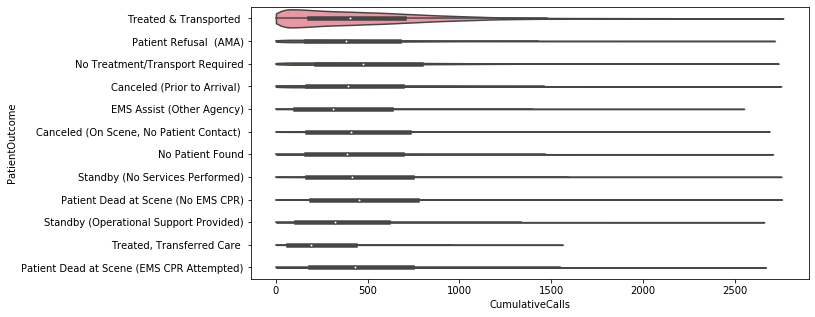

In [701]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_unitMAER, 
               scale='count',
              order=OutcomeOrder,
              cut=0);

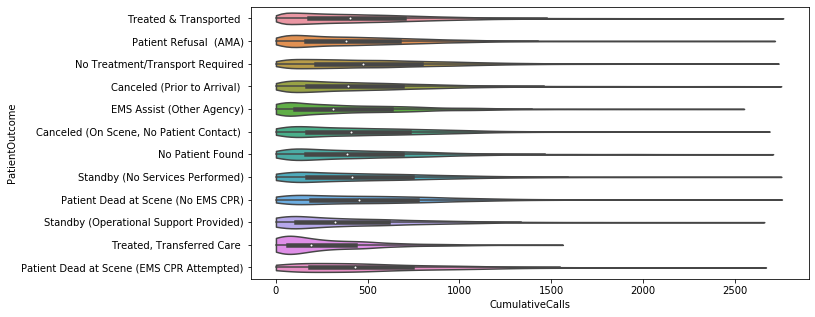

In [702]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_unitMAER, 
               scale='area',
              order=OutcomeOrder,
              cut=0);

## Try HexBin plots to get distribution of calls by tenure.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x360 with 0 Axes>

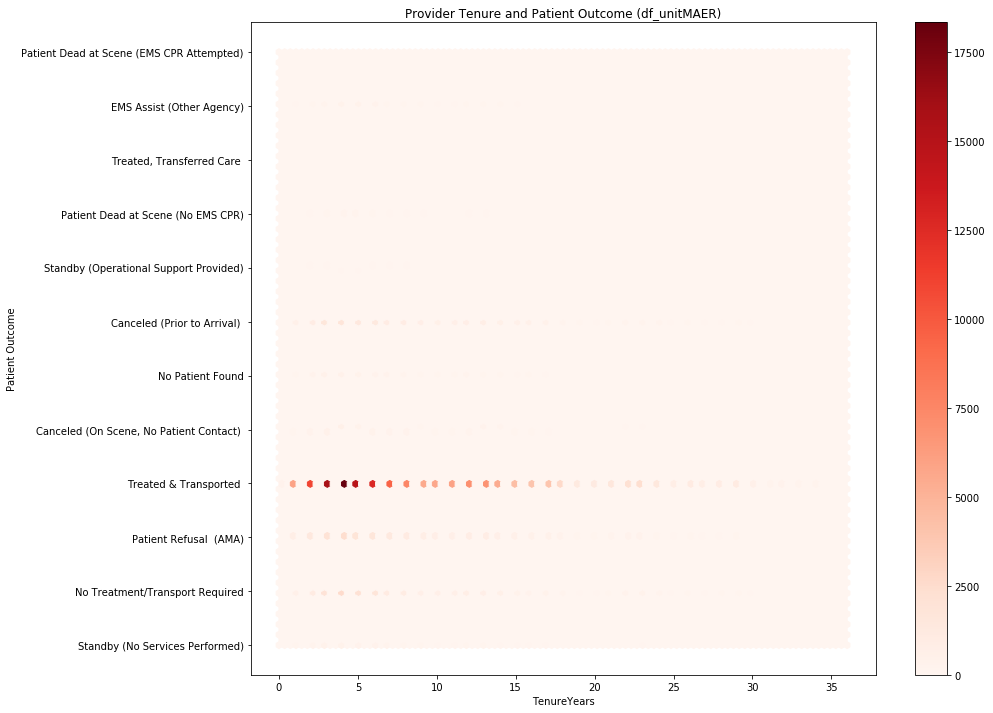

In [713]:
plt.figure(figsize=(10,5))
hb = df_unitMAER.plot.hexbin(
                       x='TenureYears', 
                       y='PatientOutcomeCode', 
#                       C='Procedure_Count',
#                       reduce_C_function=np.sum,
                       gridsize=100,
                       #cmap="viridis",
#                       cmap="nipy_spectral",
#                       cmap="nipy_spectral",
                       cmap="Reds",
#                       cmap="jet",
#                       cmap="Blues",
#                       xlabel="Provider Tenure",
#                       ylabel="Patient Outcome",
                       title="Provider Tenure and Patient Outcome (df_unitMAER)",
                       figsize=(14,12),
                       sharex=False
)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
hb.set_yticks(minor=False, ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
hb.set_yticklabels(df_PO_key.PatientOutcome.to_list())
hb.set_ylabel("Patient Outcome")

plt.show

In [704]:
#Try without the treated and transported category
df_unitMAERsub=df_unitMAER[df_unitMAER.PatientOutcomeCode!=4]

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x360 with 0 Axes>

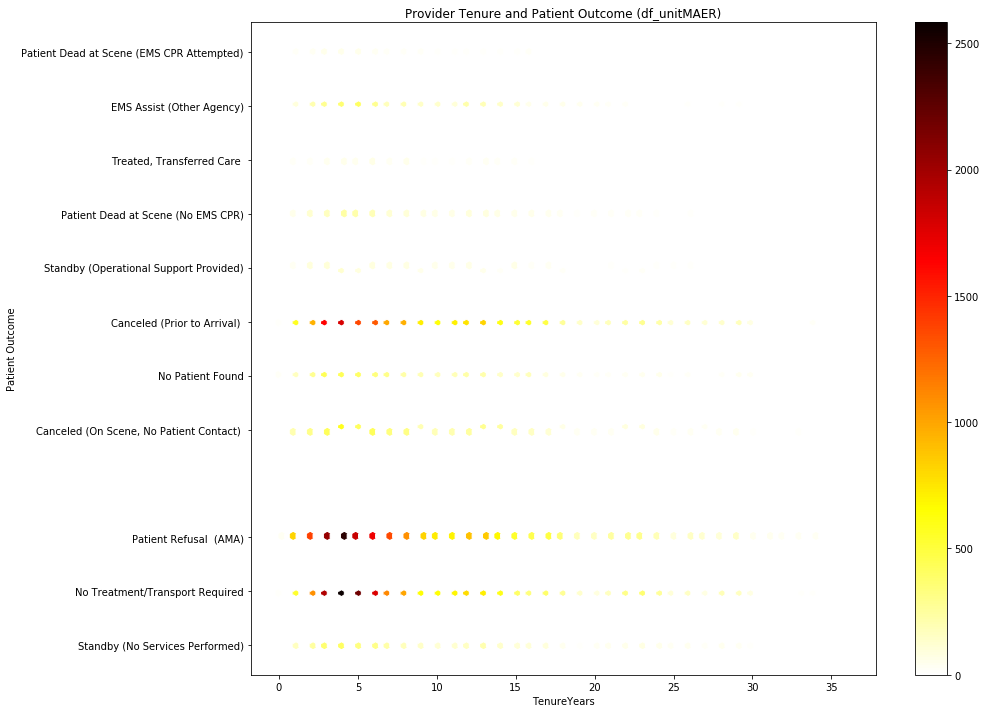

In [719]:
plt.figure(figsize=(10,5))
hb = df_unitMAERsub.plot.hexbin(
                       x='TenureYears', 
                       y='PatientOutcomeCode', 
#                       C='Procedure_Count',
#                       reduce_C_function=np.sum,
                       gridsize=100,
                       #cmap="viridis",
#                       cmap="nipy_spectral",
#                       cmap="nipy_spectral",
                       cmap="hot_r",
#                       cmap="jet",
#                       cmap="Blues",
#                       xlabel="Provider Tenure",
#                       ylabel="Patient Outcome",
                       title="Provider Tenure and Patient Outcome (df_unitMAER)",
                       figsize=(14,12),
                       sharex=False
)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
hb.set_yticks(minor=False, ticks=[1,2,3,5,6,7,8,9,10,11,12])
hb.set_yticklabels(df_PO_key.PatientOutcome[df_PO_key["PatientOutcomeCode"]!=4].to_list())
hb.set_ylabel("Patient Outcome")

plt.show

In [738]:
### Need a key for the Patient Outcome Codes
PO_key=df_unitMAER[['PatientOutcome','PatientOutcomeCode']].drop_duplicates()
df_PO_key=pd.DataFrame(PO_key)
#df_PO_key.reset_index(inplace=True)
df_PO_key.columns=["PatientOutcome","PatientOutcomeCode"]
#df_PO_key.set_index(keys=["PatientOutcome"])
df_PO_key.sort_values('PatientOutcomeCode', ascending=True, inplace=True)
df_PO_key=df_PO_key.loc[df_PO_key.PatientOutcomeCode!=0,:] #remove the NaN row
df_PO_key

,PatientOutcome,PatientOutcomeCode
2,Standby (No Services Performed),1
3,No Treatment/Transport Required,2
1,Patient Refusal (AMA),3
0,Treated & Transported,4
13,"Canceled (On Scene, No Patient Contact)",5
24,No Patient Found,6
52,Canceled (Prior to Arrival),7
54,Standby (Operational Support Provided),8
98,Patient Dead at Scene (No EMS CPR),9
133,"Treated, Transferred Care",10


Text(0, 0.5, 'Patient Outcome')

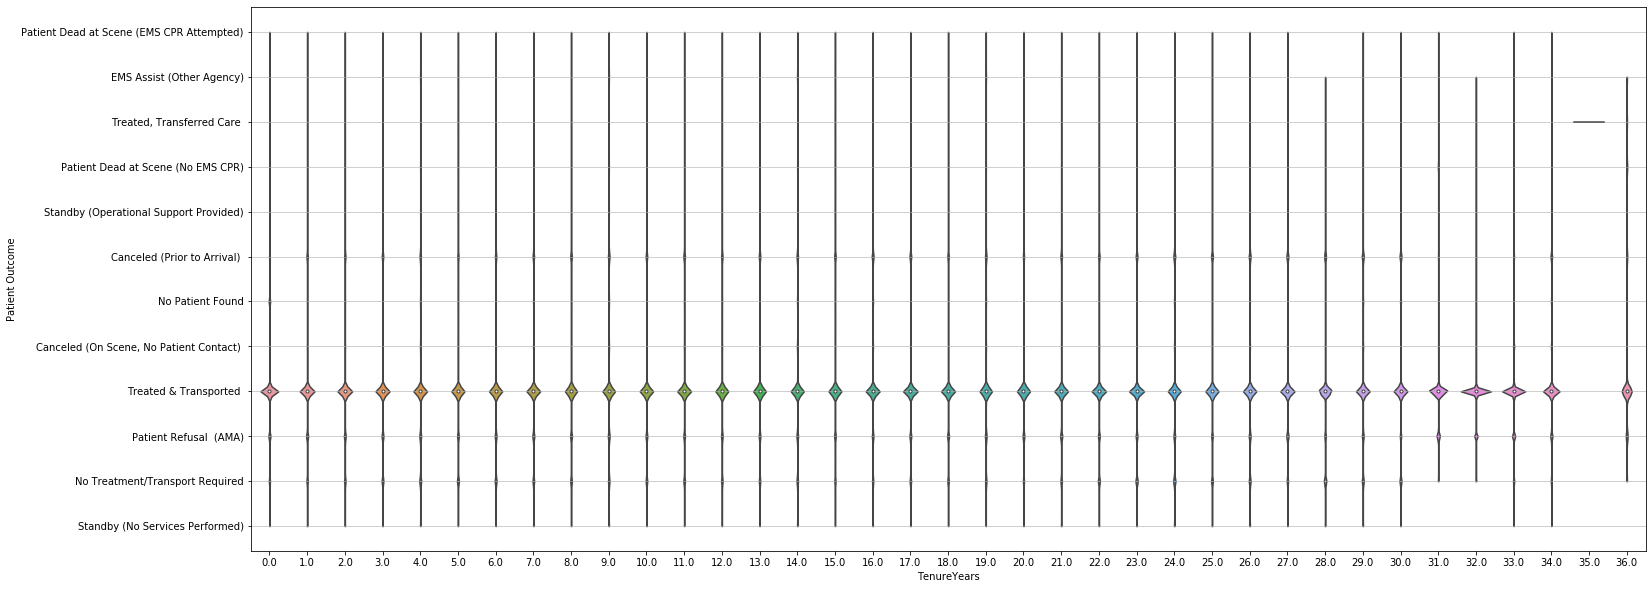

In [707]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(y="PatientOutcomeCode",x="TenureYears",
               data=df_unitMAER, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_yticklabels(df_PO_key.PatientOutcome.to_list())
ax1.set_ylabel("Patient Outcome")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


In [708]:
### Every thing is overshadowed by Treated & Transported, so lets drop it.


In [709]:
df_unitMAER_noTT=df_unitMAER[df_unitMAER['PatientOutcomeCode']!=4].copy()


Text(0, 0.5, 'Patient Outcome')

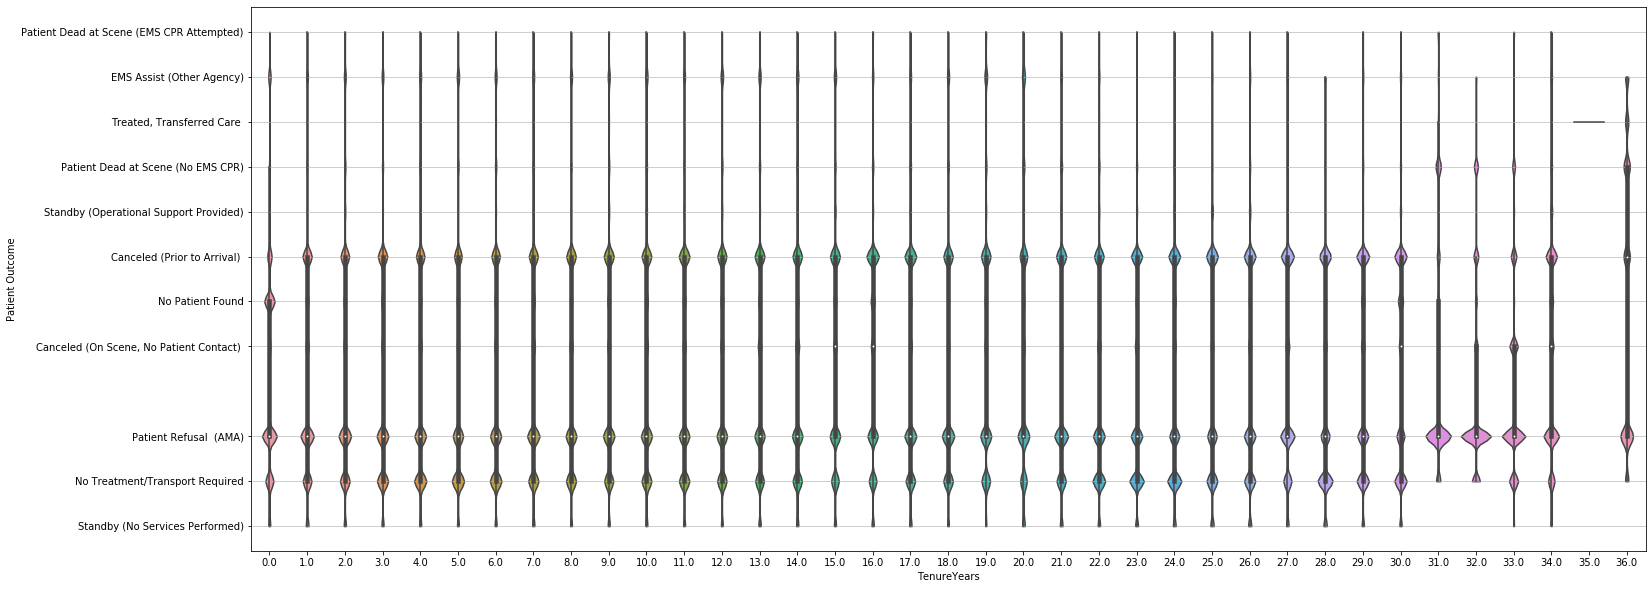

In [718]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(y="PatientOutcomeCode",x="TenureYears",
               data=df_unitMAER_noTT, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,2,3,5,6,7,8,9,10,11,12])
ax1.set_yticklabels(df_PO_key.PatientOutcome[df_PO_key["PatientOutcomeCode"]!=4].to_list())
ax1.set_ylabel("Patient Outcome")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


Text(0, 0.5, 'Patient Outcome')

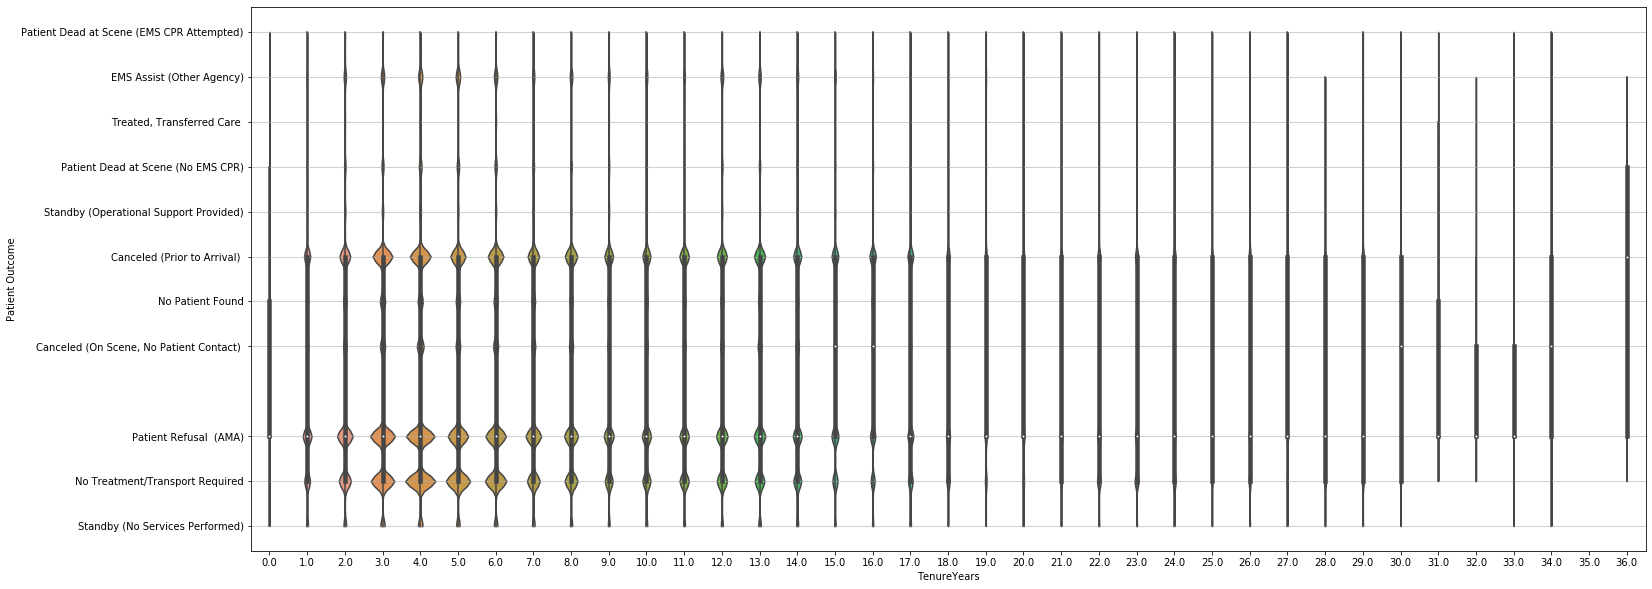

In [717]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(y="PatientOutcomeCode",x="TenureYears",
               data=df_unitMAER_noTT, 
               scale='count',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,2,3,5,6,7,8,9,10,11,12])
ax1.set_yticklabels(df_PO_key.PatientOutcome[df_PO_key["PatientOutcomeCode"]!=4].to_list())
#ax1.set_yticklabels(df_PO_key.PatientOutcome.to_list())
ax1.set_ylabel("Patient Outcome")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


## Now let's bin the outcomes as follows:
1. Assist - Treated & Transferred, EMS Assist (Other Agency)
2. Transport - Treated & Transported
3. Dead - Patient Dead at Scene (EMS CPR Attempted), Patient Dead at Scene (No EMS CPR)
4. NoPatient - No Patient Found, No Treatment/Transport Required, Canceled(On Scene, No Patient Contact)
5. Refused - Patient Refusal (AMA)
6. Standby - Standby (Operational Support Provided), Standby (No Services Performed)
7. Canceled - Canceled (Prior to Arrival)


In [739]:
df_PO_key

,PatientOutcome,PatientOutcomeCode
2,Standby (No Services Performed),1
3,No Treatment/Transport Required,2
1,Patient Refusal (AMA),3
0,Treated & Transported,4
13,"Canceled (On Scene, No Patient Contact)",5
24,No Patient Found,6
52,Canceled (Prior to Arrival),7
54,Standby (Operational Support Provided),8
98,Patient Dead at Scene (No EMS CPR),9
133,"Treated, Transferred Care",10


In [740]:
df_POCat_key=pd.DataFrame({"OutcomeCategory" : ["Assist","Transport","Dead","NoPatient","Refused","Standby","Canceled"],
                           "OutcomeCatCode": [1,2,3,4,5,6,7]}, 
                          index = [1,2,3,4,5,6,7])
df_PO_key["OutcomeCatCode"]=[6,4,5,2,4,4,7,6,3,1,1,3]
df_PO_key=pd.merge(df_PO_key,df_POCat_key,on="OutcomeCatCode",how="left")
df_POCat_key


,OutcomeCategory,OutcomeCatCode
1,Assist,1
2,Transport,2
3,Dead,3
4,NoPatient,4
5,Refused,5
6,Standby,6
7,Canceled,7


In [741]:
df_PO_key

,PatientOutcome,PatientOutcomeCode,OutcomeCatCode,OutcomeCategory
0,Standby (No Services Performed),1,6,Standby
1,No Treatment/Transport Required,2,4,NoPatient
2,Patient Refusal (AMA),3,5,Refused
3,Treated & Transported,4,2,Transport
4,"Canceled (On Scene, No Patient Contact)",5,4,NoPatient
5,No Patient Found,6,4,NoPatient
6,Canceled (Prior to Arrival),7,7,Canceled
7,Standby (Operational Support Provided),8,6,Standby
8,Patient Dead at Scene (No EMS CPR),9,3,Dead
9,"Treated, Transferred Care",10,1,Assist


In [742]:
df_unitMAER_cat=pd.merge(df_unitMAER,df_PO_key[['PatientOutcomeCode','OutcomeCatCode','OutcomeCategory']],on='PatientOutcomeCode',how="left")
df_unitMAER_cat.head()

,FRDPersonnelID,DispatchTime,index,PatientId,UnitId,FireStation,Battalion,PatientOutcome,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,PatientOutcomeCode,TenureYears,TenureDecade,CallCount,CumulativeCalls,Type,OutcomeCatCode,OutcomeCategory
0,58D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:04:06,7,479853,M435,35,407,Treated & Transported,Male,2004-07-12,"Primary Patient Caregiver-At Scene,Primary Pat...",161,4,13.0,1.0,1,1,M,2,Transport
1,87FF4CAE-C419-E511-80CA-001DD8B71D38,2018-01-01 00:20:49,6,479851,M419,19,406,Patient Refusal (AMA),Male,2015-01-12,"Primary Patient Caregiver-At Scene,Primary Pat...",35,3,2.0,0.0,1,1,M,5,Refused
2,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:29:02,0,479838,M404,4,401,Standby (No Services Performed),Male,1997-08-18,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,20.0,2.0,1,1,M,6,Standby
3,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:40:54,3,479839,M401,1,402,No Treatment/Transport Required,Male,2011-10-24,"Primary Patient Caregiver-At Scene,Primary Pat...",74,2,6.0,0.0,1,1,M,4,NoPatient
4,35CA45A3-9C25-4E4D-957F-2EA9E40B5974,2018-01-01 00:42:53,18,479876,M416,16,407,Treated & Transported,Male,2016-02-08,"Primary Patient Caregiver-At Scene,Primary Pat...",22,4,1.0,0.0,1,1,M,2,Transport


## Now that the outcome category has been added to the main dataframe let's repeat the visualizations

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x360 with 0 Axes>

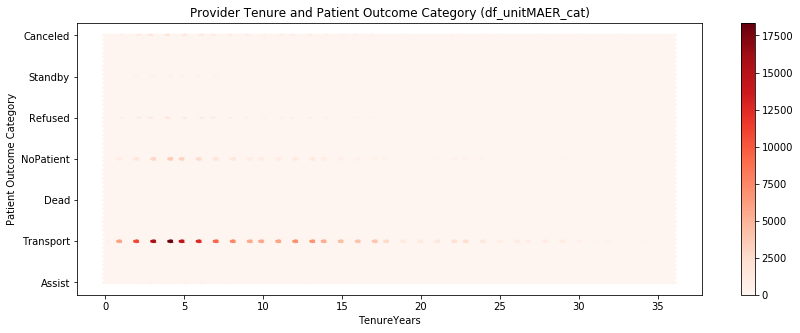

In [745]:
plt.figure(figsize=(10,5))
hb = df_unitMAER_cat.plot.hexbin(
                       x='TenureYears', 
                       y='OutcomeCatCode', 
#                       C='Procedure_Count',
#                       reduce_C_function=np.sum,
                       gridsize=100,
                       #cmap="viridis",
#                       cmap="nipy_spectral",
#                       cmap="nipy_spectral",
                       cmap="Reds",
#                       cmap="jet",
#                       cmap="Blues",
#                       xlabel="Provider Tenure",
#                       ylabel="Patient Outcome",
                       title="Provider Tenure and Patient Outcome Category (df_unitMAER_cat)",
                       figsize=(14,5),
                       sharex=False
)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
hb.set_yticks(minor=False, ticks=[1,2,3,4,5,6,7])
hb.set_yticklabels(df_POCat_key.OutcomeCategory.to_list())
hb.set_ylabel("Patient Outcome Category")

plt.show

In [746]:
#Try without the transport category
df_unitMAER_catsub=df_unitMAER_cat[df_unitMAER_cat.OutcomeCatCode!=2]

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x360 with 0 Axes>

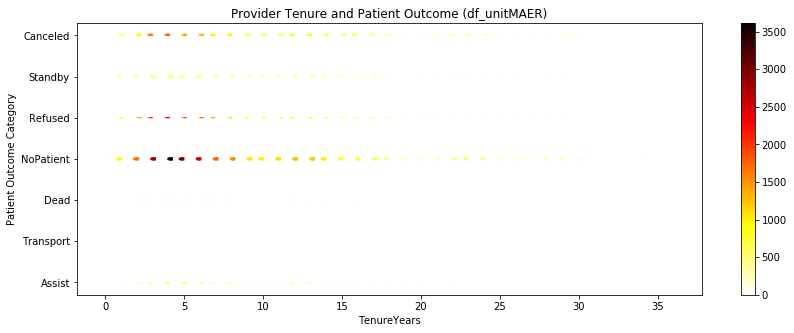

In [747]:
plt.figure(figsize=(10,5))
hb = df_unitMAER_catsub.plot.hexbin(
                       x='TenureYears', 
                       y='OutcomeCatCode', 
#                       C='Procedure_Count',
#                       reduce_C_function=np.sum,
                       gridsize=100,
                       #cmap="viridis",
#                       cmap="nipy_spectral",
#                       cmap="nipy_spectral",
                       cmap="hot_r",
#                       cmap="jet",
#                       cmap="Blues",
#                       xlabel="Provider Tenure",
#                       ylabel="Patient Outcome",
                       title="Provider Tenure and Patient Outcome (df_unitMAER)",
                       figsize=(14,5),
                       sharex=False
)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
hb.set_yticks(minor=False, ticks=[1,2,3,4,5,6,7])
hb.set_yticklabels(df_POCat_key.OutcomeCategory.to_list())
hb.set_ylabel("Patient Outcome Category")

plt.show

In [759]:
df_POCat_key.OutcomeCategory.to_list()

['Assist', 'Transport', 'Dead', 'NoPatient', 'Refused', 'Standby', 'Canceled']

***

Text(0, 0.5, 'Patient Outcome Category')

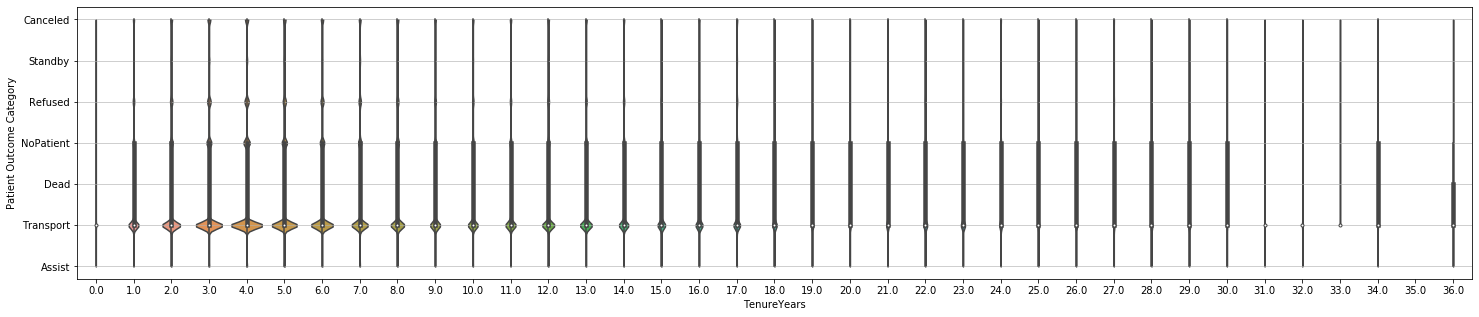

In [766]:
plt.figure(figsize=(25,5))
ax1=sns.violinplot(y="OutcomeCatCode",x="TenureYears",
               data=df_unitMAER_cat, 
               scale='count',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,2,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory.to_list())
ax1.set_ylabel("Patient Outcome Category")


Text(0, 0.5, 'Patient Outcome Category')

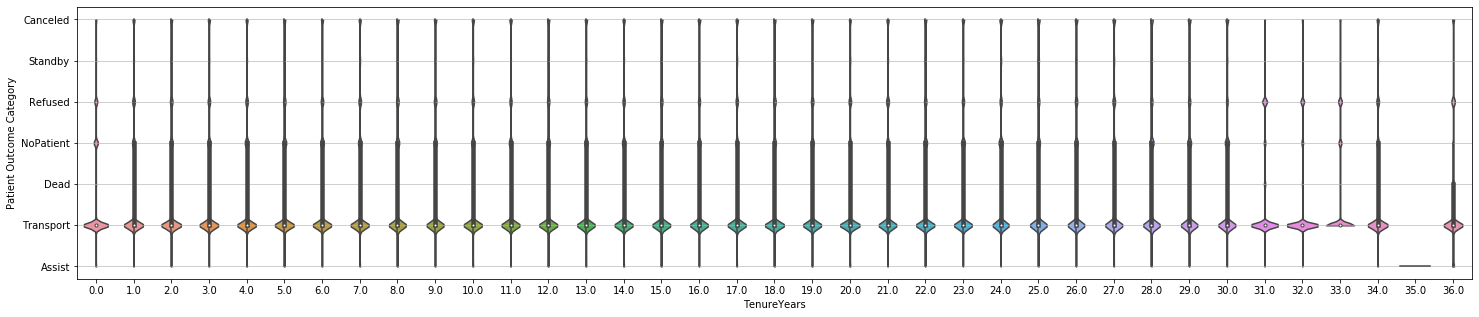

In [761]:
plt.figure(figsize=(25,5))
ax1=sns.violinplot(y="OutcomeCatCode",x="TenureYears",
               data=df_unitMAER_cat, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,2,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory.to_list())
ax1.set_ylabel("Patient Outcome Category")


***

Text(0, 0.5, 'Patient Outcome Category')

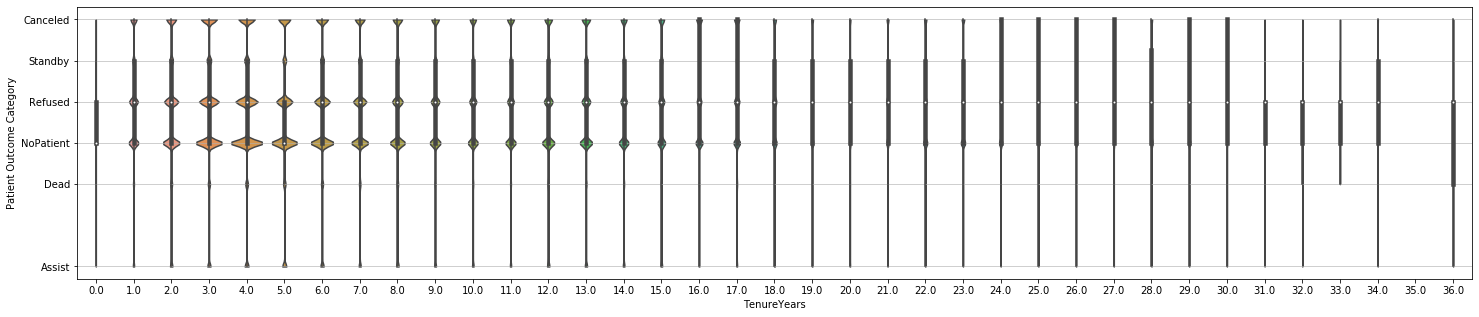

In [763]:
plt.figure(figsize=(25,5))
ax1=sns.violinplot(y="OutcomeCatCode",x="TenureYears",
               data=df_unitMAER_catsub, 
               scale='count',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory[df_POCat_key["OutcomeCatCode"]!=2].to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


Text(0, 0.5, 'Patient Outcome Category')

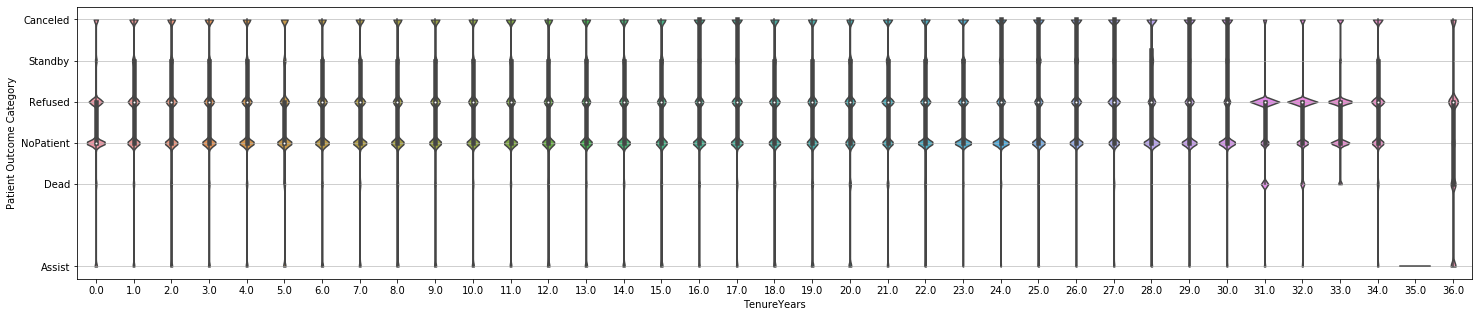

In [764]:
plt.figure(figsize=(25,5))
ax1=sns.violinplot(y="OutcomeCatCode",x="TenureYears",
               data=df_unitMAER_catsub, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory[df_POCat_key["OutcomeCatCode"]!=2].to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


***

Text(0, 0.5, 'Patient Outcome Category')

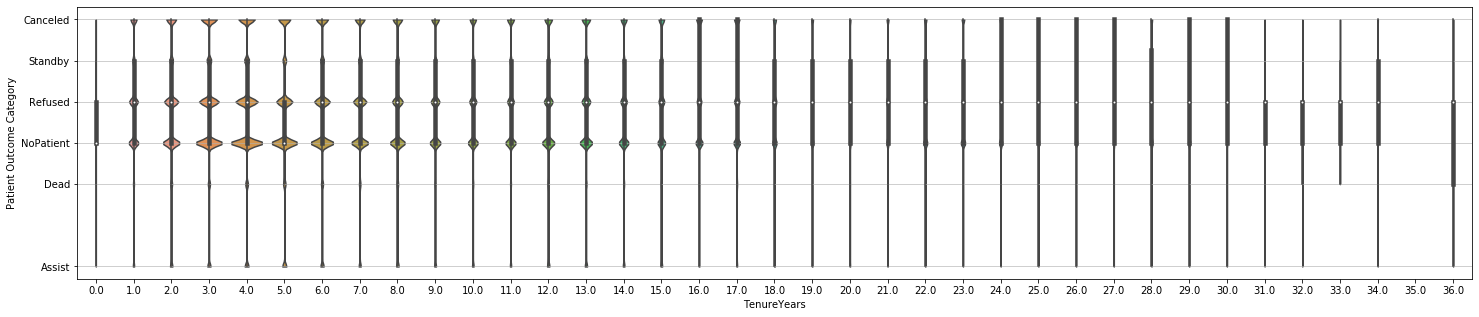

In [763]:
plt.figure(figsize=(25,5))
ax1=sns.violinplot(y="OutcomeCatCode",x="TenureYears",
               data=df_unitMAER_catsub, 
               scale='count',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory[df_POCat_key["OutcomeCatCode"]!=2].to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


Text(0, 0.5, 'Patient Outcome Category')

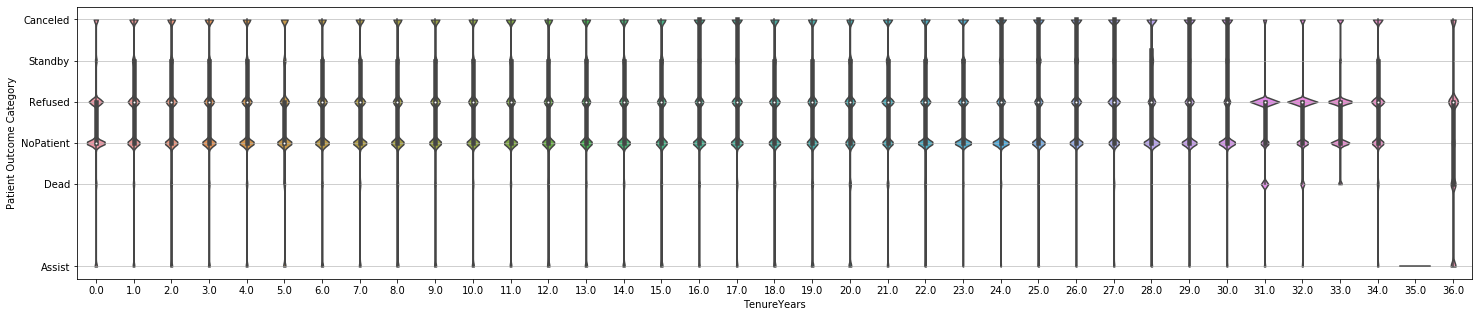

In [765]:
plt.figure(figsize=(25,5))
ax1=sns.violinplot(x="TenureYears",y="OutcomeCatCode",
               data=df_unitMAER_catsub, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
              cut=0);
ax1.grid(axis='y', alpha=.75, which='both')
ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory[df_POCat_key["OutcomeCatCode"]!=2].to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


***

Text(0, 0.5, 'Patient Outcome Category')

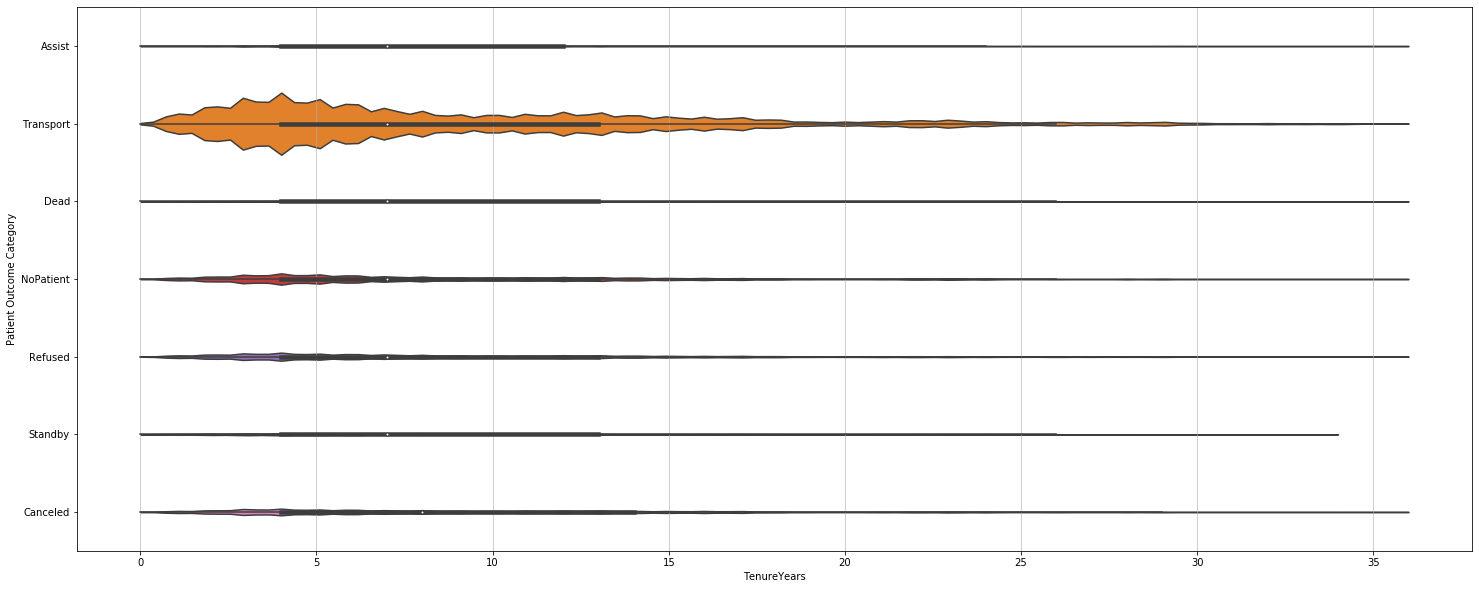

In [774]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(x="TenureYears",y="OutcomeCatCode",
               data=df_unitMAER_cat, 
               scale='count',
#              order=OutcomeOrder,
               bw=.05,
               orient='h',
               cut=0);
ax1.grid(axis='x', alpha=.75, which='both')
#ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory.to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


Text(0, 0.5, 'Patient Outcome Category')

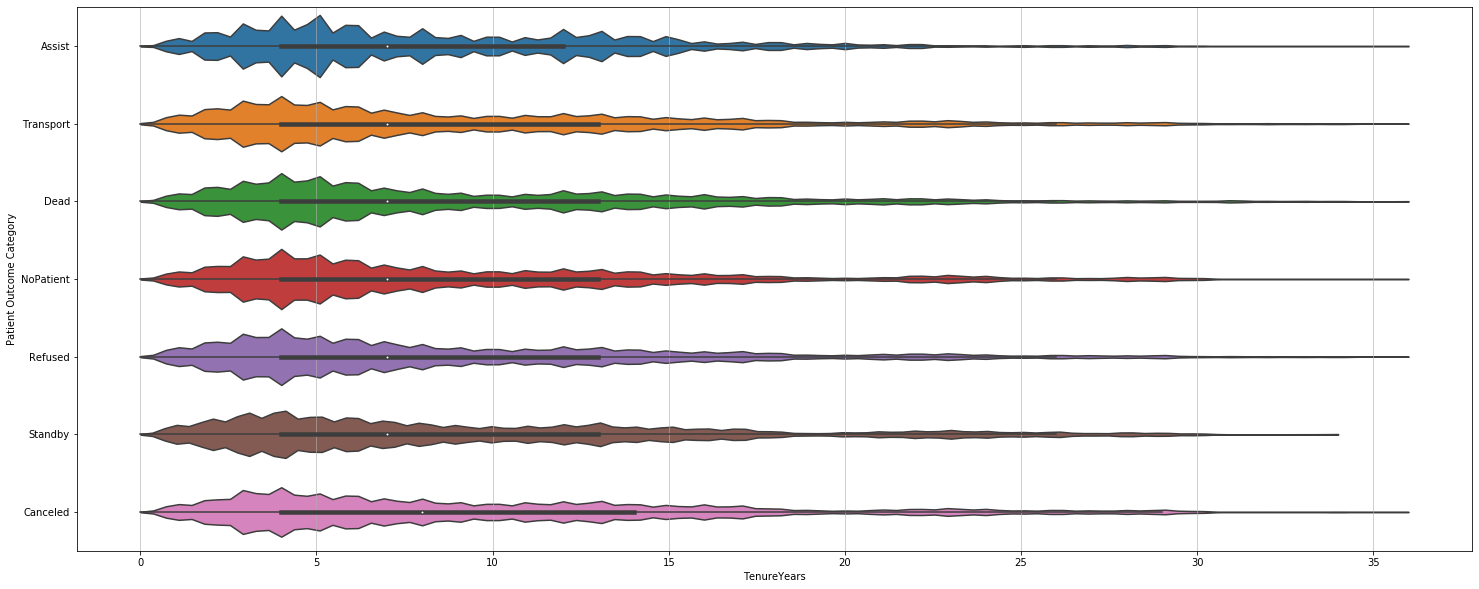

In [775]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(x="TenureYears",y="OutcomeCatCode",
               data=df_unitMAER_cat, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
               orient='h',
               cut=0);
ax1.grid(axis='x', alpha=.75, which='both')
#ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory.to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


Text(0, 0.5, 'Patient Outcome Category')

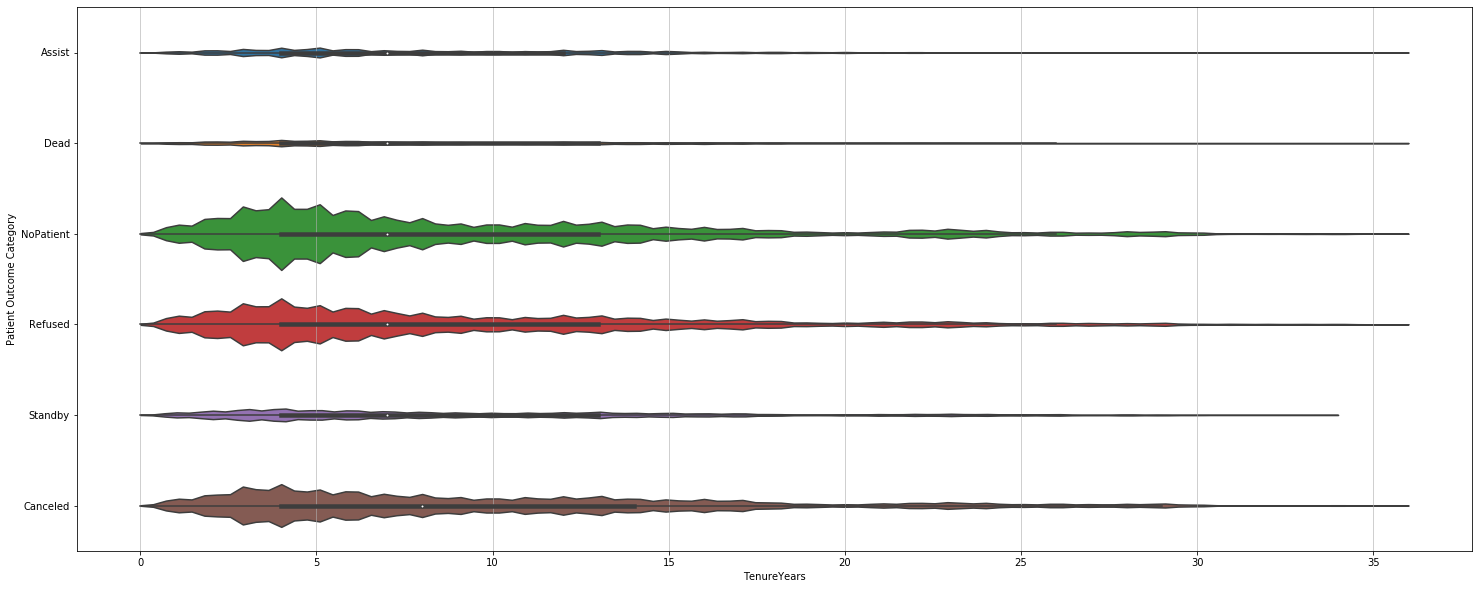

In [777]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(x="TenureYears",y="OutcomeCatCode",
               data=df_unitMAER_catsub, 
               scale='count',
#              order=OutcomeOrder,
               bw=.05,
               orient='h',
               cut=0);
ax1.grid(axis='x', alpha=.75, which='both')
#ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory[df_POCat_key["OutcomeCatCode"]!=2].to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


Text(0, 0.5, 'Patient Outcome Category')

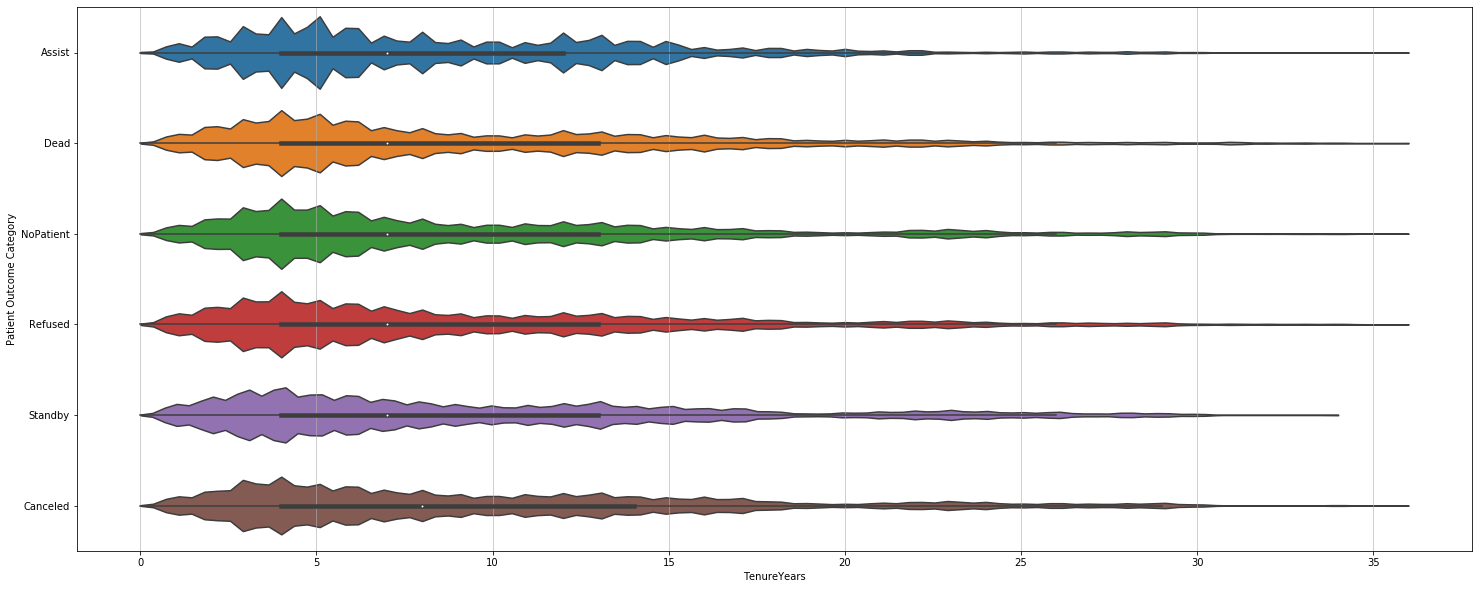

In [776]:
plt.figure(figsize=(25,10))
ax1=sns.violinplot(x="TenureYears",y="OutcomeCatCode",
               data=df_unitMAER_catsub, 
               scale='area',
#              order=OutcomeOrder,
               bw=.05,
               orient='h',
               cut=0);
ax1.grid(axis='x', alpha=.75, which='both')
#ax1.set_yticks(minor=False, ticks=[1,3,4,5,6,7])
ax1.set_yticklabels(df_POCat_key.OutcomeCategory[df_POCat_key["OutcomeCatCode"]!=2].to_list())
ax1.set_ylabel("Patient Outcome Category")
#ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])


## Summary
### Question: Is there a relationship between Category of EMS call outcome and the provider tenure?
__Answer: There seems to be NO significant indicators of a relationship or anomaly associated with tenure and the EMS Call Outcome.__

### Conclusions / Observations

1. The distribution of Patient Outcomes is nominally similar across all tenures (by year).
2. The distribution of tenures (by year) is nominally similar across all patient outcomes.
3. These distributions are consistent with the distributions of their underlying factors.
4. __Add some more detail here__

### Recommendations / Next Steps

1. Clearly define tenure at the beginning of the analysis.
2. Improve the collection of the key factors in calculating tenure (e.g. personnel start date).
3. Record "author" as a field to determine who made the patient outcome determination and who was responsible for creating the ECPR.
4. Provide additional training or refresher information to staff on data entry norms. (One line per provider with multi-select for roles instead of one line per role)
5. Investigate some other ways to determine tenure (call count, years experience, etc)

